# Y&Z 세대와 Not-Y&Z 세대를 소소하게 비교해보자.  
## [목차]
* **[서론]**
    + 과제 선정 배경(Y&Z vs Not-Y&Z)  
    + 데이터 전처리
* **[본론 1]**
    + Y&Z세대 vs Not-Y&Z세대(성별, 연령, 지역, 고객등급, 고객투자성향)
    + Y&Z세대 vs Not-Y&Z세대(성별&연령, 성별&지역, 성별&고객등급, 성별&고객투자성향)
    + Y&Z세대 vs Not-Y&Z세대(계좌 개설 연도)
    + Y&Z세대 vs Not-Y&Z세대(주문 날짜)
    + Y&Z세대 vs Not-Y&Z세대(주문 접수&체결 시간대)
    + Y&Z세대 vs Not-Y&Z세대(주문매체구분코드)
    + Y&Z세대 vs Not-Y&Z세대(주식 거래 종목 순위)
    + Y&Z세대 vs Not-Y&Z세대(투자 성향별 주식 거래 종목 순위)
    + Y&Z세대 vs Not-Y&Z세대(주식 투자 유형 : 보통주vs우선주)
    + Y&Z세대 vs Not-Y&Z세대(코스피 하락장에서의 매매 분포)
    
* **[본론 2]**
    + '투자위험종목'에 투자한 고객이 있다? 
    + 그럴만한 배경이 있을 것이다. (추후 분석 예정)

* **[결론]**
    + Y&Z세대 특징 요약

# [서론]
![intro](intro.png)

## 데이터 불러오기 및 전처리

In [1]:
setwd("D:/reague2")

In [ ]:
install.packages("stringr")
install.packages("plyr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("patchwork")
install.packages("scales")
install.packages("readxl")
install.packages("wordcloud2")

In [33]:
library(stringr)
library(plyr)
library(dplyr)
library(ggplot2)
library(patchwork)
library(scales)
library(readxl)
library(wordcloud2)

In [4]:
# 고객 정보 데이터
cus_info = read.csv("2_cus_info.csv", sep=",", header = T, encoding = "UTF-8")
colnames(cus_info)[1] <- c("cus_id")
cus_info$sex_dit_cd = as.factor(ifelse(cus_info$sex_dit_cd==1, "male", "female"))
cus_info$zip_ctp_cd = as.factor(cus_info$zip_ctp_cd)
cus_info$tco_cus_grd_cd = as.factor(cus_info$tco_cus_grd_cd)
cus_info$ivs_icn_cd = as.factor(cus_info$ivs_icn_cd)

# 계좌 정보 데이터
act_info = read.csv("2_act_info.csv", sep=",", header = T, encoding = "UTF-8")
colnames(act_info)[1] <- c("act_id")

# 종목 정보 데이터
iem_info = read.csv("2_iem_info.csv", sep=",", header = T, encoding = "UTF-8")
colnames(iem_info)[1] <- c("iem_cd")
iem_info[,1] = str_squish(iem_info[,1])
iem_info[,2] = str_squish(iem_info[,2])
iem_info[,3] = str_squish(iem_info[,3])

# 국내 주식 매매 정보 데이터
trd_kr = read.csv("2_trd_kr.csv", sep=",", header = T, encoding = "UTF-8")
colnames(trd_kr)[1] <- c("act_id")
trd_kr$iem_cd = str_squish(trd_kr$iem_cd)
trd_kr$orr_rtn_hur = as.factor(trd_kr$orr_rtn_hur)
trd_kr$lst_cns_hur = as.factor(trd_kr$lst_cns_hur)
trd_kr$sby_dit_cd = as.factor(ifelse(trd_kr$sby_dit_cd==1, "sell", "buy"))
trd_kr$orr_mdi_dit_cd = as.factor(trd_kr$orr_mdi_dit_cd)


# 데이터 병합
# 주식 종목에 대한 코드 정보 + 국내 주식 매매 정보
iem_trd = inner_join(iem_info, trd_kr, by='iem_cd')

# 주식 종목에 대한 코드 정보 + 국내 주식 매매 정보 + 고객별 계좌 정보
iem_trd_act = inner_join(iem_trd, act_info, by='act_id')

# # 주식 종목에 대한 코드 정보 + 국내 주식 매매 정보 + 고객별 계좌 정보 + 고객 정보
iem_trd_act_cus = inner_join(iem_trd_act, cus_info, by='cus_id')

### Y&Z세대, Not-Y&Z세대 테이블

In [6]:
iem_trd_act_cus_yz = iem_trd_act_cus %>% filter(cus_age %in% c(20, 25, 30, 35))
iem_trd_act_cus_yz$cus_age = as.factor(iem_trd_act_cus_yz$cus_age)

iem_trd_act_cus_nyz = iem_trd_act_cus %>% filter(cus_age %in% c(0, 40, 45, 50, 55, 60, 65, 70))
iem_trd_act_cus_nyz$cus_age = as.factor(iem_trd_act_cus_nyz$cus_age)

# [본론1]

## Y&Z세대 vs Not-Y&Z세대(성별)

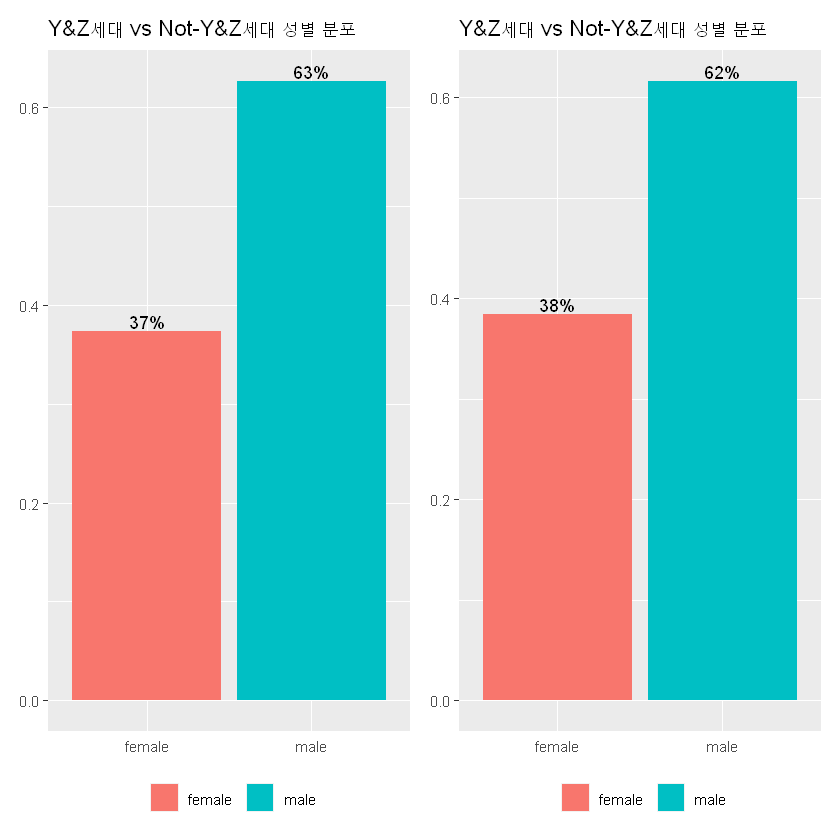

In [7]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, sex_dit_cd) %>% 
  ggplot(aes(sex_dit_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position='bottom') +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle("Y&Z세대 vs Not-Y&Z세대 성별 분포") +
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, sex_dit_cd) %>% 
  ggplot(aes(sex_dit_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position='bottom') +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle("Y&Z세대 vs Not-Y&Z세대 성별 분포")

# Y&Z세대 vs Not-Y&Z세대(연령)

.
  20   25   30   35 
 340  892  944 1198 

.
   0   40   45   50   55   60   65   70 
 204 1296 1491 1260  985  644  306  349 

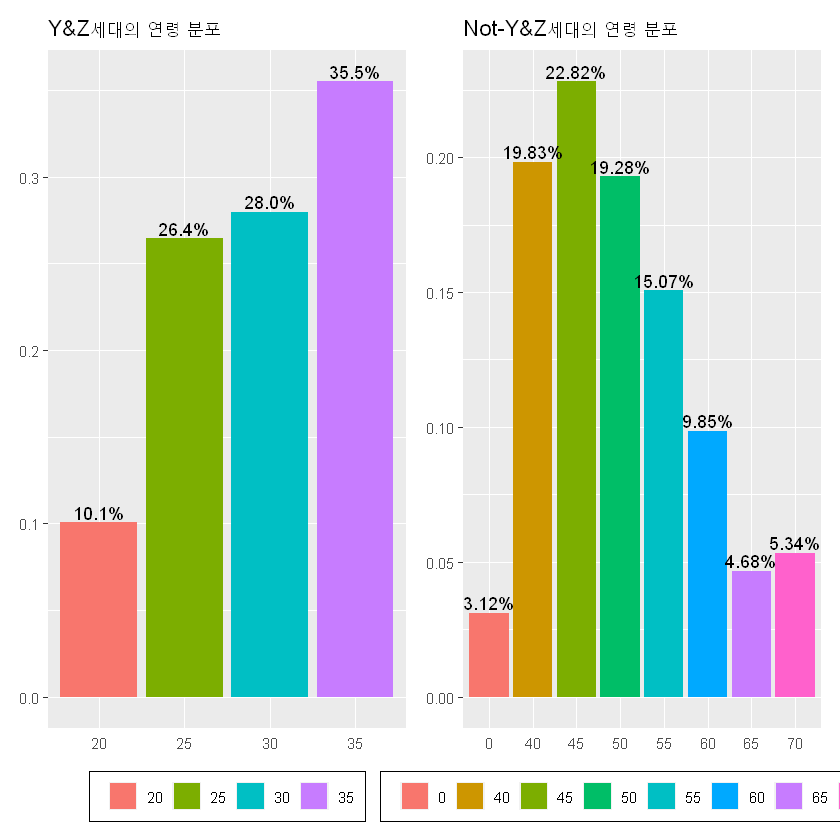

In [8]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, cus_age) %>%
  select(cus_age) %>% 
  table()
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, cus_age) %>%
  select(cus_age) %>% 
  table()

iem_trd_act_cus_yz %>% 
  distinct(cus_id, cus_age) %>% 
  ggplot(aes(cus_age, fill=cus_age)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1, 1, 1, 1)) +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle("Y&Z세대의 연령 분포") +
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, cus_age) %>% 
  ggplot(aes(cus_age, fill=cus_age)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle("Not-Y&Z세대의 연령 분포")

# Y&Z세대 vs Not-Y&Z세대(지역)

.
  -  11  26  27  28  29  30  31  36  41  42  43  44  45  46  47  48  50 
 14 861 169 149 163  91 107  68  33 856  80 101 132  88  85 133 214  30 

.
   -   11   26   27   28   29   30   31   36   41   42   43   44   45   46   47 
  26 1513  374  266  253  220  174  133   73 1827  172  172  256  155  188  261 
  48   50 
 403   69 

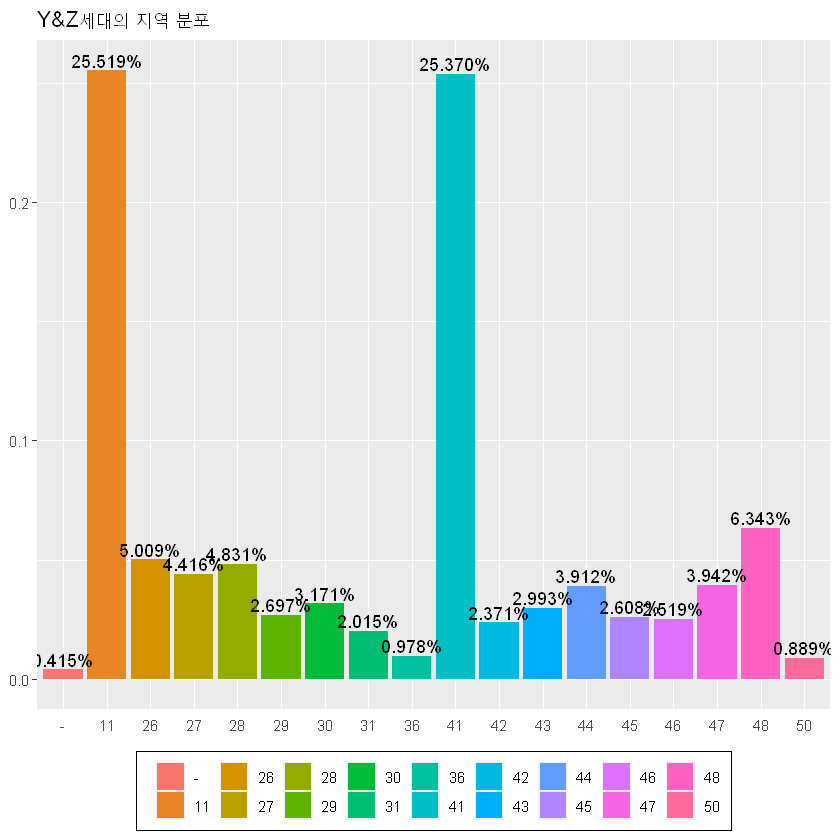

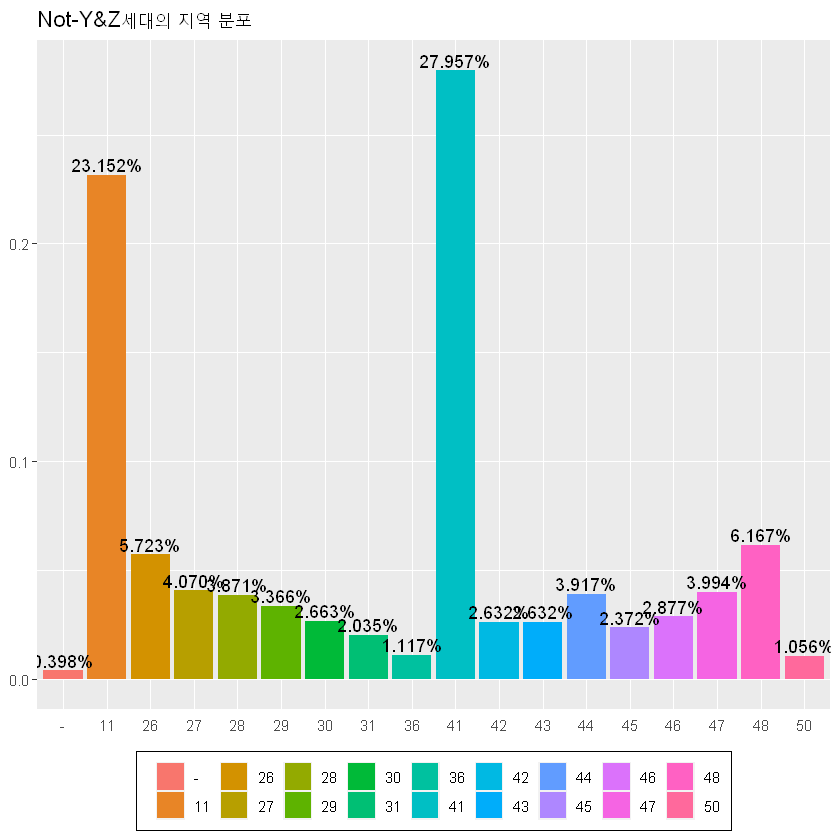

In [9]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, zip_ctp_cd) %>% 
  select(zip_ctp_cd) %>% 
  table()
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, zip_ctp_cd) %>% 
  select(zip_ctp_cd) %>% 
  table()

iem_trd_act_cus_yz %>% 
  distinct(cus_id, zip_ctp_cd) %>% 
  ggplot(aes(zip_ctp_cd, fill=zip_ctp_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 2)) +
  ggtitle("Y&Z세대의 지역 분포")
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, zip_ctp_cd) %>% 
  ggplot(aes(zip_ctp_cd, fill=zip_ctp_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 2)) +
  ggtitle("Not-Y&Z세대의 지역 분포")

# Y&Z세대 vs Not-Y&Z세대(고객등급)

.
  _    01   02   03   04   05   09 
 350   18   48  199  565  892 1302 

.
  _    01   02   03   04   05   09 
 275  164  392 1046 1602 1570 1486 

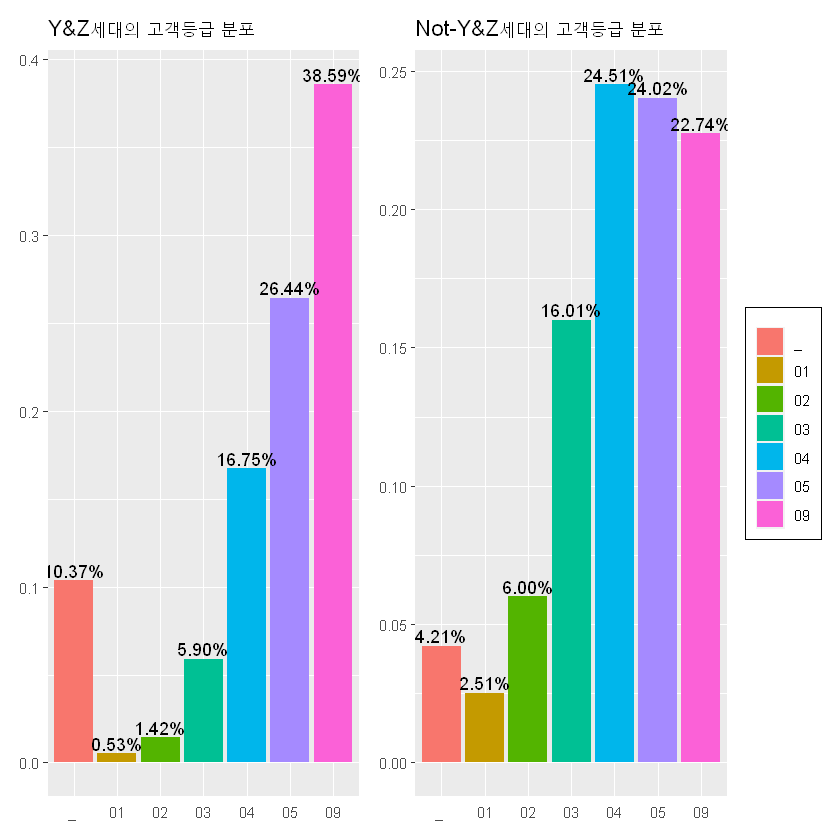

In [10]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, tco_cus_grd_cd) %>% 
  select(tco_cus_grd_cd) %>% 
  table()
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, tco_cus_grd_cd) %>% 
  select(tco_cus_grd_cd) %>% 
  table()

iem_trd_act_cus_yz %>% 
  distinct(cus_id, tco_cus_grd_cd) %>% 
  ggplot(aes(tco_cus_grd_cd, fill=tco_cus_grd_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.position = "none") +
  ggtitle("Y&Z세대의 고객등급 분포") +
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, tco_cus_grd_cd) %>% 
  ggplot(aes(tco_cus_grd_cd, fill=tco_cus_grd_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "right",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(ncol = 1)) +
  ggtitle("Not-Y&Z세대의 고객등급 분포")

# Y&Z세대 vs Not-Y&Z세대(고객투자성향)

.
   -   00   01   02   03   04   05   09 
1256   60  104  527  571  561  294    1 

.
   -   00   01   02   03   04   05   09 
3047  113   60  527  914 1255  618    1 

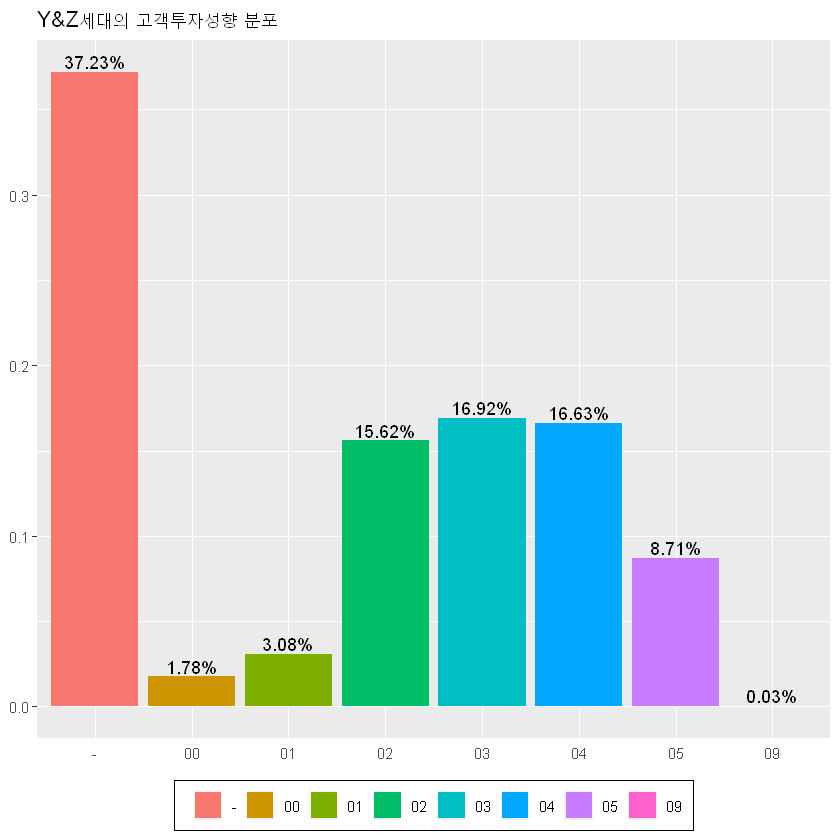

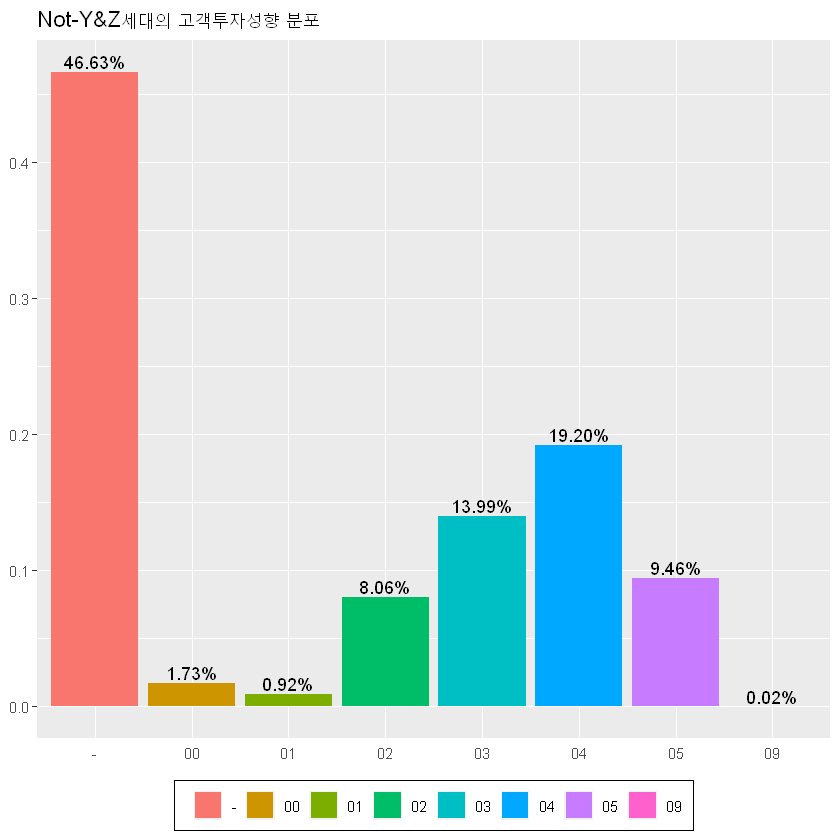

In [11]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, ivs_icn_cd) %>% 
  select(ivs_icn_cd) %>% 
  table()
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, ivs_icn_cd) %>% 
  select(ivs_icn_cd) %>% 
  table()

iem_trd_act_cus_yz %>% 
  distinct(cus_id, ivs_icn_cd) %>% 
  ggplot(aes(ivs_icn_cd, fill=ivs_icn_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle("Y&Z세대의 고객투자성향 분포")
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, ivs_icn_cd) %>% 
  ggplot(aes(ivs_icn_cd, fill=ivs_icn_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle("Not-Y&Z세대의 고객투자성향 분포")

# Y&Z세대 vs Not-Y&Z세대(성별&연령)

          cus_age
sex_dit_cd  20  25  30  35
    female 113 358 355 434
    male   227 534 589 764

          cus_age
sex_dit_cd   0  40  45  50  55  60  65  70
    female  86 463 576 520 391 254 108 111
    male   118 833 915 740 594 390 198 238

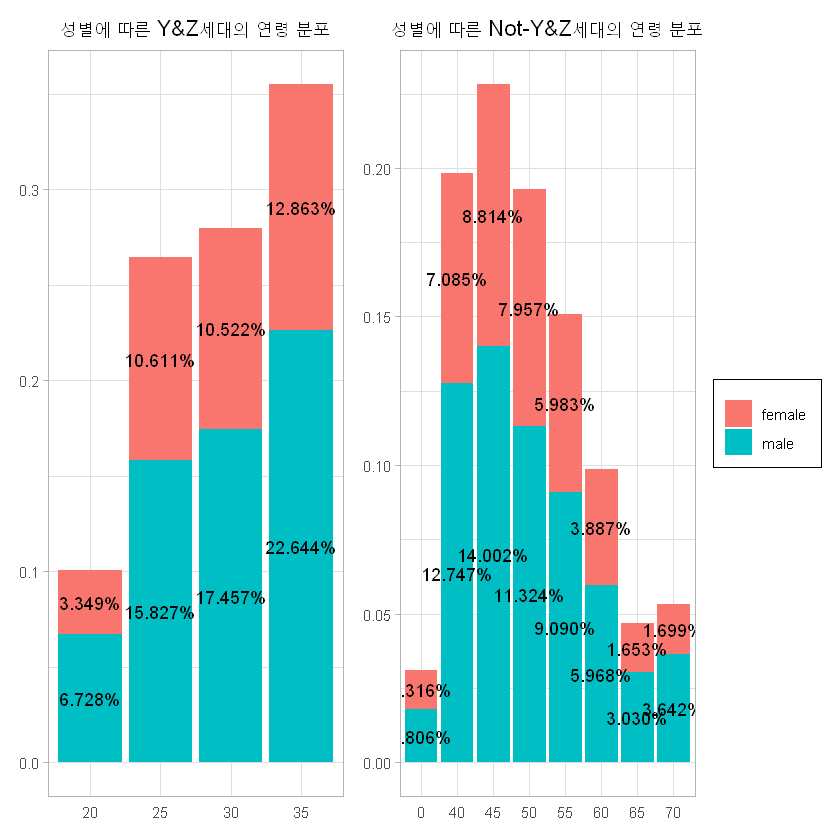

In [12]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, sex_dit_cd, cus_age) %>% 
  select(sex_dit_cd, cus_age) %>% 
  table
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, sex_dit_cd, cus_age) %>% 
  select(sex_dit_cd, cus_age) %>% 
  table

iem_trd_act_cus_yz %>% 
  distinct(cus_id, sex_dit_cd, cus_age) %>% 
  ggplot(aes(cus_age, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Y&Z세대의 연령 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.position = "none") +
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, sex_dit_cd, cus_age) %>% 
  ggplot(aes(cus_age, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Not-Y&Z세대의 연령 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "right",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(ncol = 1))

# Y&Z세대 vs Not-Y&Z세대(성별&지역)

          zip_ctp_cd
sex_dit_cd   -  11  26  27  28  29  30  31  36  41  42  43  44  45  46  47  48
    female   7 357  61  48  71  33  39  21  16 332  26  29  37  31  33  43  67
    male     7 504 108 101  92  58  68  47  17 524  54  72  95  57  52  90 147
          zip_ctp_cd
sex_dit_cd  50
    female   9
    male    21

          zip_ctp_cd
sex_dit_cd    -   11   26   27   28   29   30   31   36   41   42   43   44
    female    7  618  150  104  102   96   56   47   30  742   64   48   70
    male     19  895  224  162  151  124  118   86   43 1085  108  124  186
          zip_ctp_cd
sex_dit_cd   45   46   47   48   50
    female   55   73   92  131   24
    male    100  115  169  272   45

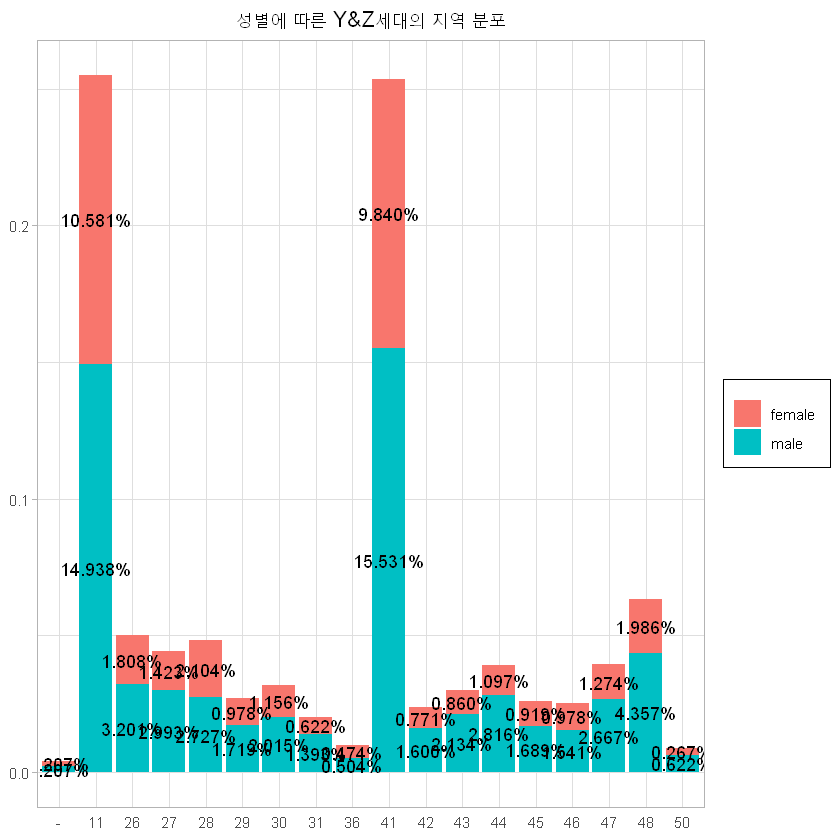

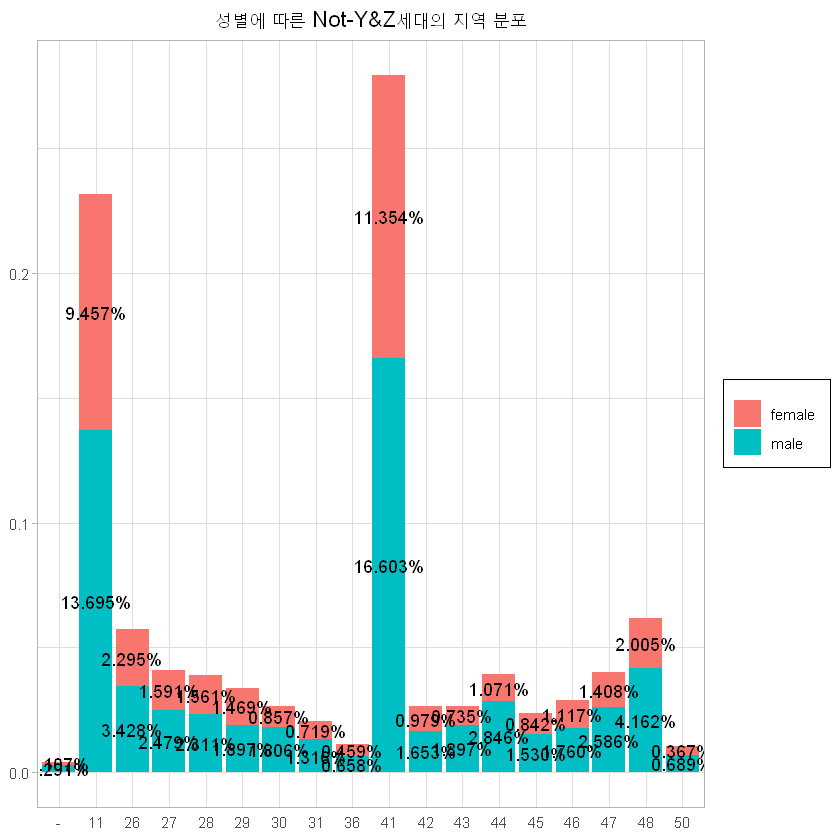

In [13]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, zip_ctp_cd, sex_dit_cd) %>% 
  select(sex_dit_cd, zip_ctp_cd) %>% 
  table
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, zip_ctp_cd, sex_dit_cd) %>% 
  select(sex_dit_cd, zip_ctp_cd) %>% 
  table

iem_trd_act_cus_yz %>% 
  distinct(cus_id, zip_ctp_cd, sex_dit_cd) %>% 
  ggplot(aes(zip_ctp_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Y&Z세대의 지역 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "right",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(ncol = 1))
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, zip_ctp_cd, sex_dit_cd) %>% 
  ggplot(aes(zip_ctp_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Not-Y&Z세대의 지역 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "right",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(ncol = 1))

# Y&Z세대 vs Not-Y&Z세대(성별&고객등급)

          tco_cus_grd_cd
sex_dit_cd  _   01  02  03  04  05  09
    female 156   4  18  51 169 314 548
    male   194  14  30 148 396 578 754

          tco_cus_grd_cd
sex_dit_cd   _    01   02   03   04   05   09
    female  146   44  129  338  544  662  646
    male    129  120  263  708 1058  908  840

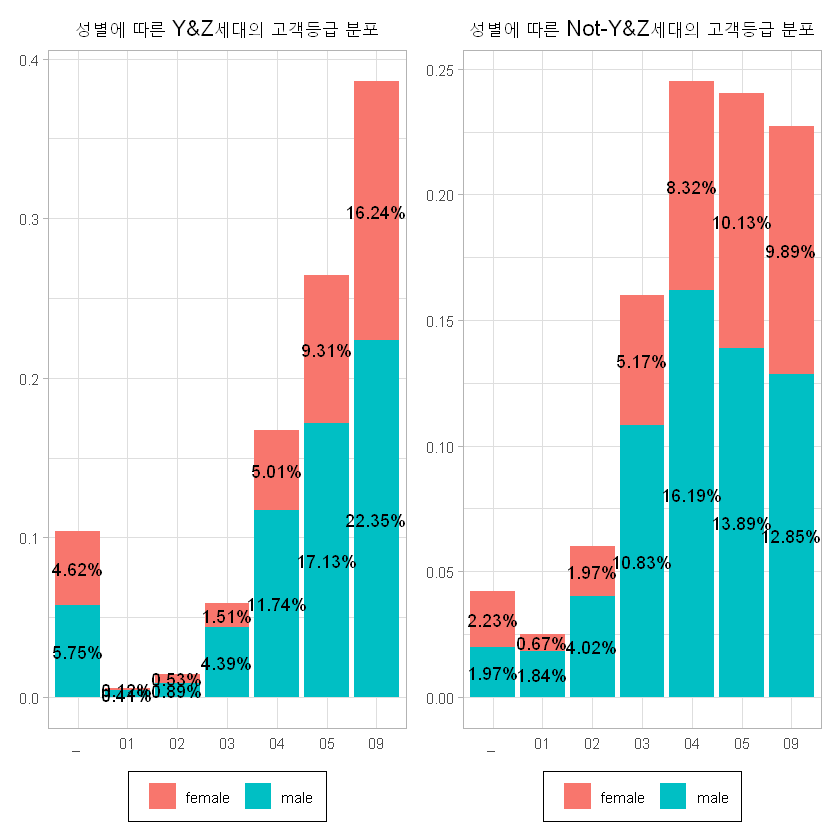

In [14]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, tco_cus_grd_cd, sex_dit_cd) %>% 
  select(sex_dit_cd, tco_cus_grd_cd) %>% 
  table
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, tco_cus_grd_cd, sex_dit_cd) %>% 
  select(sex_dit_cd, tco_cus_grd_cd) %>% 
  table

iem_trd_act_cus_yz %>% 
  distinct(cus_id, tco_cus_grd_cd, sex_dit_cd) %>% 
  ggplot(aes(tco_cus_grd_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Y&Z세대의 고객등급 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 1)) +
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, tco_cus_grd_cd, sex_dit_cd) %>% 
  ggplot(aes(tco_cus_grd_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Not-Y&Z세대의 고객등급 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 1))

# Y&Z세대 vs Not-Y&Z세대(성별&고객투자성향)

          ivs_icn_cd
sex_dit_cd   -  00  01  02  03  04  05  09
    female 543  27  36 217 181 177  79   0
    male   713  33  68 310 390 384 215   1

          ivs_icn_cd
sex_dit_cd    -   00   01   02   03   04   05   09
    female 1258   49   37  245  339  405  176    0
    male   1789   64   23  282  575  850  442    1

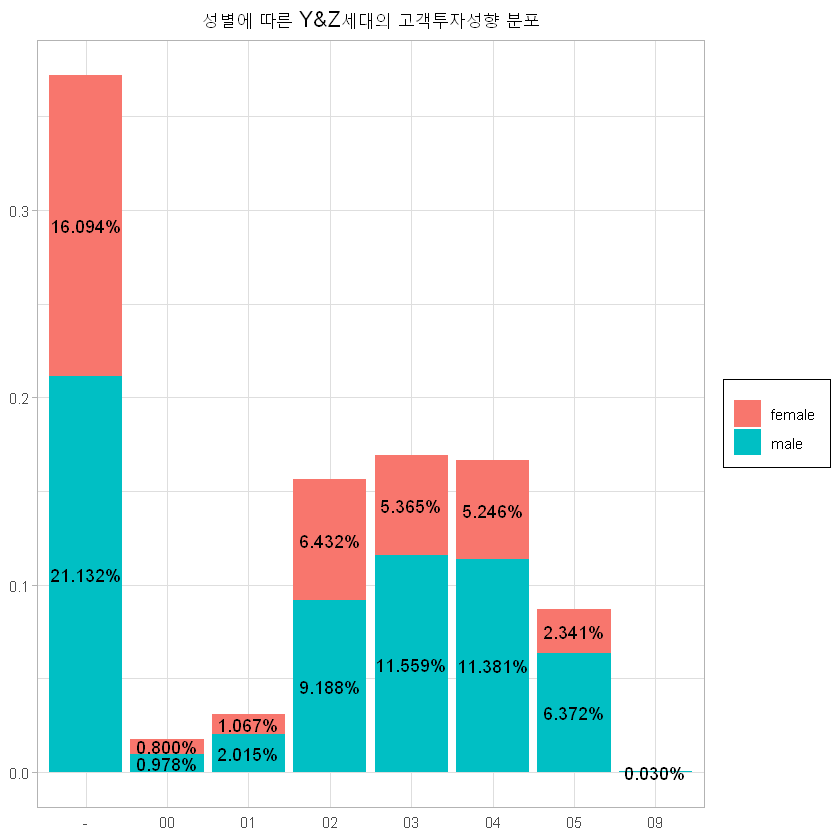

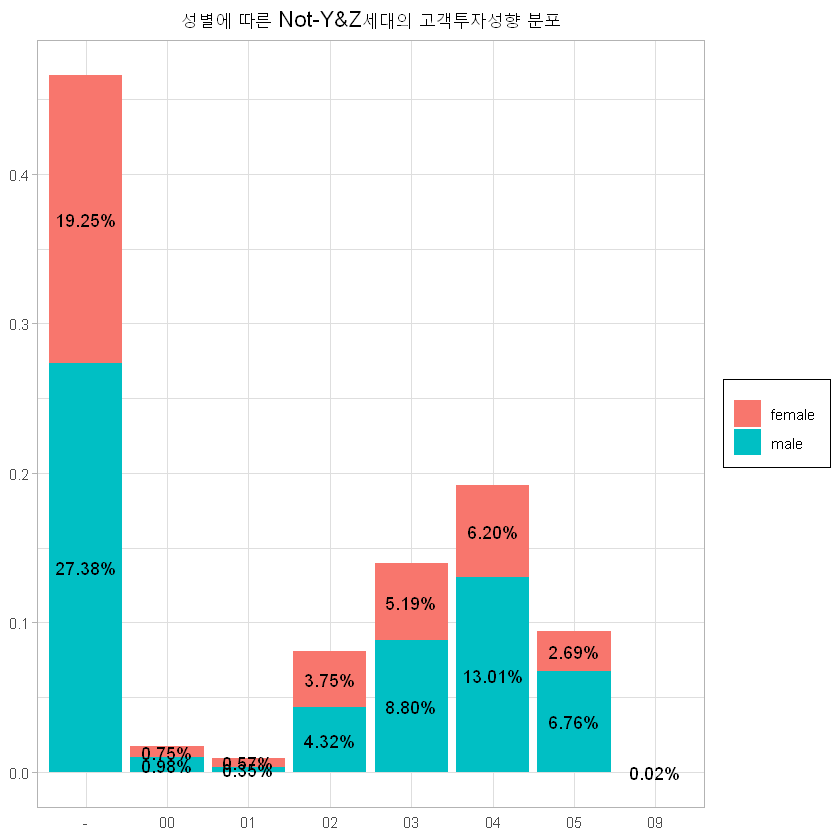

In [15]:
iem_trd_act_cus_yz %>% 
  distinct(cus_id, ivs_icn_cd, sex_dit_cd) %>% 
  select(sex_dit_cd, ivs_icn_cd) %>% 
  table
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, ivs_icn_cd, sex_dit_cd) %>% 
  select(sex_dit_cd, ivs_icn_cd) %>% 
  table

iem_trd_act_cus_yz %>% 
  distinct(cus_id, ivs_icn_cd, sex_dit_cd) %>% 
  ggplot(aes(ivs_icn_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Y&Z세대의 고객투자성향 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "right",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(ncol = 1))
iem_trd_act_cus_nyz %>% 
  distinct(cus_id, ivs_icn_cd, sex_dit_cd) %>% 
  ggplot(aes(ivs_icn_cd, fill=sex_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  ggtitle('성별에 따른 Not-Y&Z세대의 고객투자성향 분포') +
  theme_light() + 
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "right",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(ncol = 1))

# Y&Z세대 vs Not-Y&Z세대(계좌 개설 연도)

.
1987 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    1    1    2    3    3    2    1    4   11   31   22   37   42   41   38 
2013 2014 2015 2016 2017 2018 2019 2020 
  70   71   81  121  360  585  669 1499 

.
1976 1979 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 
   1    1    1    1    3    4   23   21    5    4   17   20   26   31   32   70 
1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 
  88  281  135  101   90   75   75  137  129  295  208  199  161  184  138  192 
2014 2015 2016 2017 2018 2019 2020 
 203  300  276  563  881  755 1575 

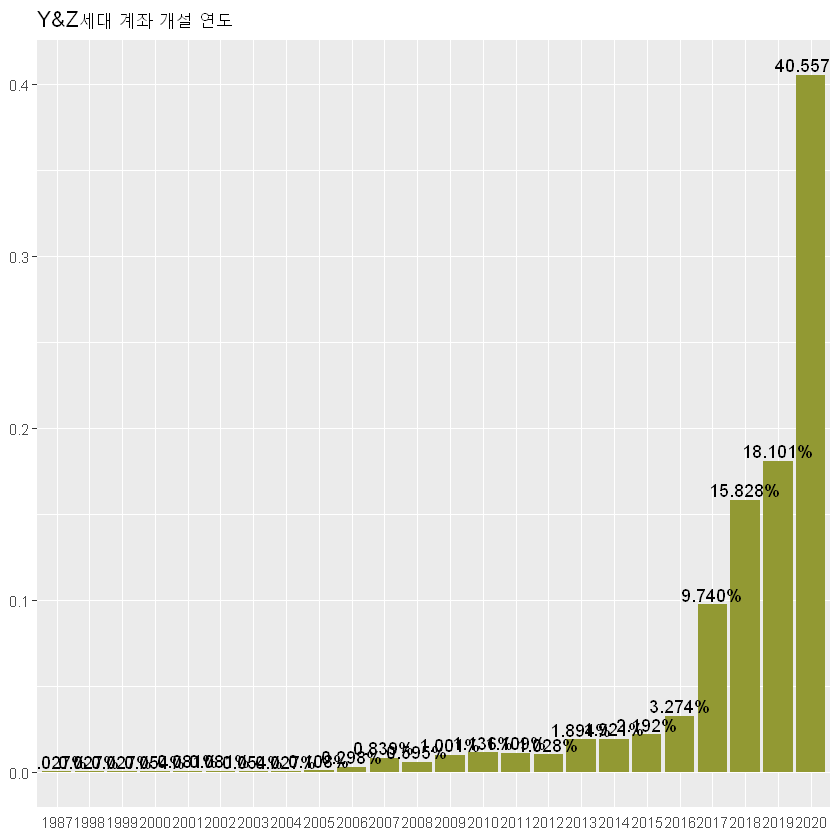

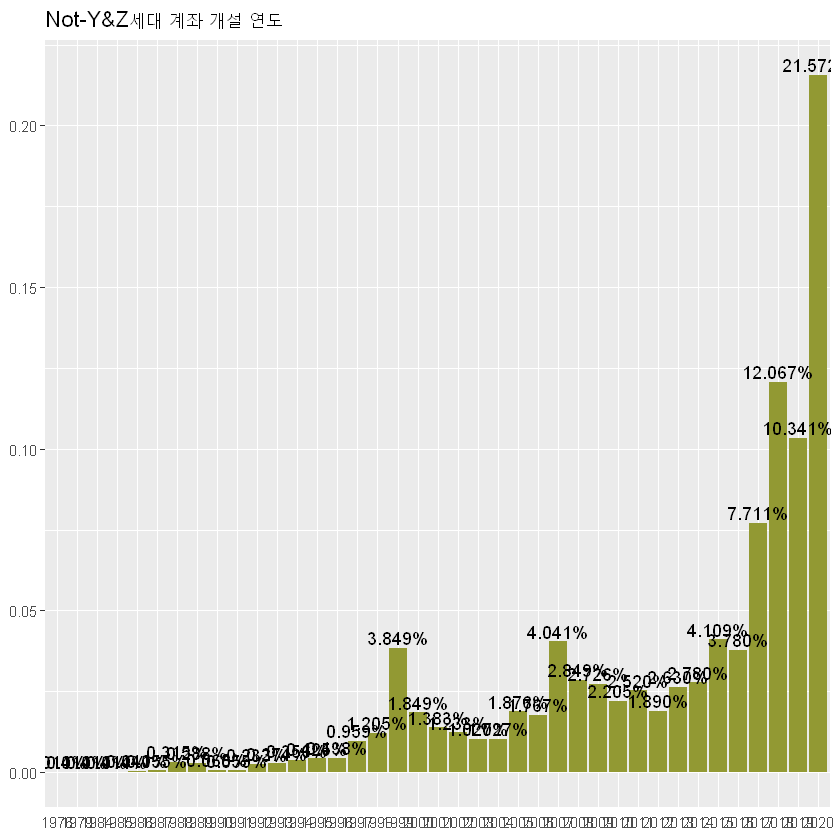

In [16]:
iem_trd_act_cus_yz$act_opn_y = substr(iem_trd_act_cus_yz$act_opn_ym, 1, 4)
iem_trd_act_cus_nyz$act_opn_y = substr(iem_trd_act_cus_nyz$act_opn_ym, 1, 4)

iem_trd_act_cus_yz %>% 
  distinct(act_id, act_opn_y) %>% 
  select(act_opn_y) %>% 
  table()
iem_trd_act_cus_nyz %>% 
  distinct(act_id, act_opn_y) %>% 
  select(act_opn_y) %>% 
  table()

iem_trd_act_cus_yz %>% 
  distinct(act_id, act_opn_y) %>% 
  ggplot(aes(act_opn_y)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#929933') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  ggtitle("Y&Z세대 계좌 개설 연도")
iem_trd_act_cus_nyz %>% 
  distinct(act_id, act_opn_y) %>% 
  ggplot(aes(act_opn_y)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#929933') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  ggtitle("Not-Y&Z세대 계좌 개설 연도")

# Y&Z세대 vs Not-Y&Z세대(주문 날짜)

.
201901 201902 201903 201904 201905 201906 201907 201908 201909 201910 201911 
 20788  18444  20808  26993  24137  22551  25499  20721  19739  27206  29017 
201912 202001 202002 202003 202004 202005 202006 
 24329  32959  49277  78713 124352 119833 153254 

.
201901 201902 201903 201904 201905 201906 201907 201908 201909 201910 201911 
100494  78643  78824 101284  90379  87894 103681 101266  99324 103404 110928 
201912 202001 202002 202003 202004 202005 202006 
 98201 133087 156493 218940 254229 238212 318761 

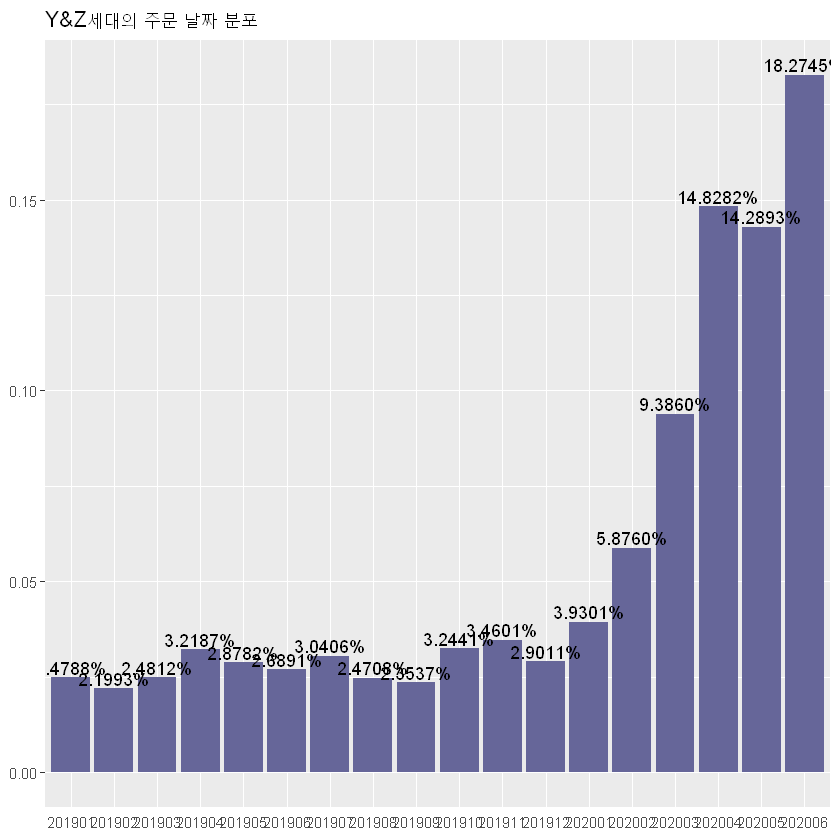

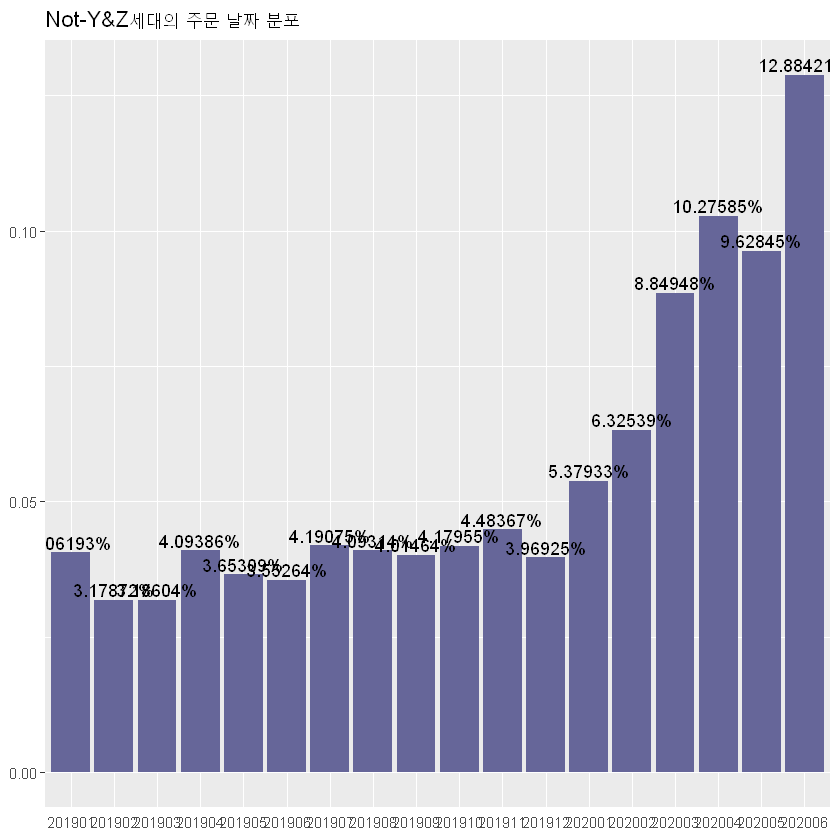

In [17]:
iem_trd_act_cus_yz$orr_dt_ym = as.factor(substr(iem_trd_act_cus_yz$orr_dt, 1, 6))
iem_trd_act_cus_nyz$orr_dt_ym = as.factor(substr(iem_trd_act_cus_nyz$orr_dt, 1, 6))

iem_trd_act_cus_yz$orr_dt_ym %>% 
  table()
iem_trd_act_cus_nyz$orr_dt_ym %>% 
  table()

iem_trd_act_cus_yz %>% 
  ggplot(aes(orr_dt_ym)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#666699') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle('Y&Z세대의 주문 날짜 분포') 
iem_trd_act_cus_nyz %>% 
  ggplot(aes(orr_dt_ym)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#666699') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle('Not-Y&Z세대의 주문 날짜 분포')

# Y&Z세대 vs Not-Y&Z세대(주문 접수&체결 시간대)

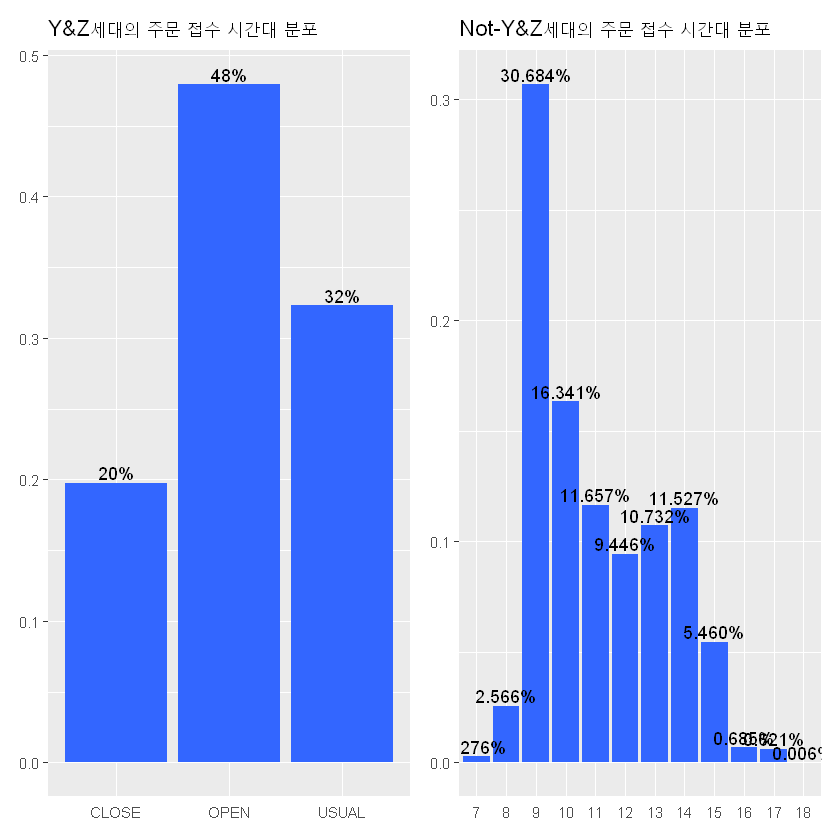

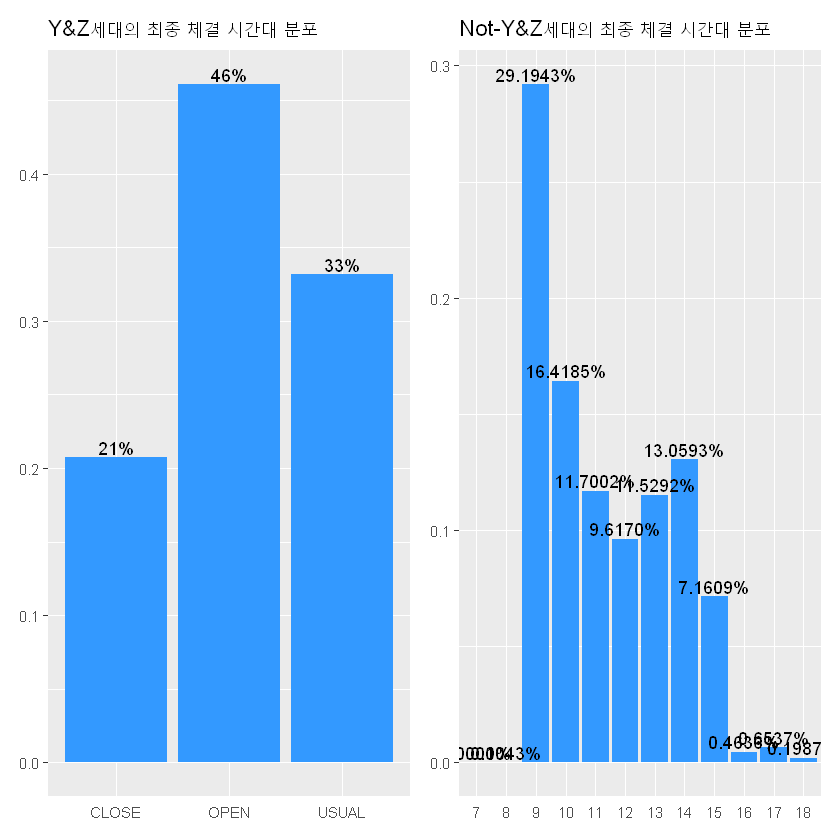

In [18]:
iem_trd_act_cus_yz$orr_rtn_hur = ifelse(iem_trd_act_cus_yz$orr_rtn_hur %in% c('9','10'), "OPEN", ifelse(iem_trd_act_cus_yz$orr_rtn_hur %in% c('11','12','13'), "USUAL", "CLOSE")) 
iem_trd_act_cus_yz$lst_cns_hur = ifelse(iem_trd_act_cus_yz$lst_cns_hur %in% c('9','10'), "OPEN", ifelse(iem_trd_act_cus_yz$lst_cns_hur %in% c('11','12','13'), "USUAL", "CLOSE")) 

iem_trd_act_cus_yz %>%
  ggplot(aes(orr_rtn_hur)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#3366FF') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle('Y&Z세대의 주문 접수 시간대 분포') +
iem_trd_act_cus_nyz %>%
  ggplot(aes(orr_rtn_hur)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#3366FF') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle('Not-Y&Z세대의 주문 접수 시간대 분포')

iem_trd_act_cus_yz %>%
  ggplot(aes(lst_cns_hur)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#3399FF') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle('Y&Z세대의 최종 체결 시간대 분포') +
iem_trd_act_cus_nyz %>%
  ggplot(aes(lst_cns_hur)) +
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='#3399FF') +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle('Not-Y&Z세대의 최종 체결 시간대 분포')

# Y&Z세대 vs Not-Y&Z세대(주문매체구분코드)

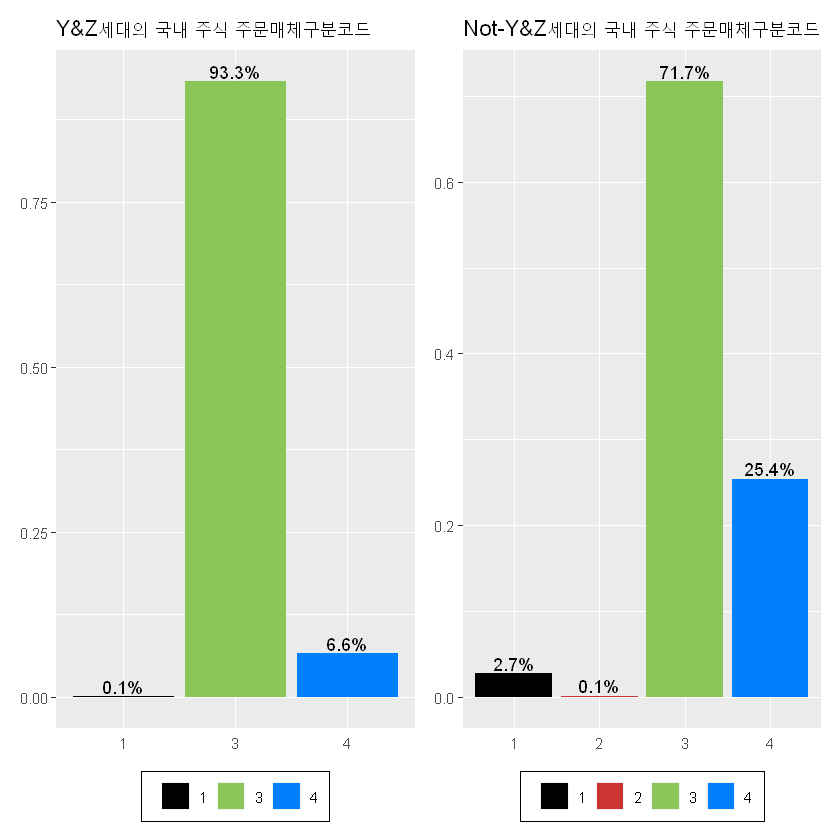

In [19]:
iem_trd_act_cus_yz %>% 
  ggplot(aes(orr_mdi_dit_cd, fill=orr_mdi_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 1)) +
  scale_fill_manual(values = c('1'="#000000", '3'="#8ac75a", '4'="#007fff")) +
  ggtitle("Y&Z세대의 국내 주식 주문매체구분코드") +
iem_trd_act_cus_nyz %>% 
  ggplot(aes(orr_mdi_dit_cd, fill=orr_mdi_dit_cd)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  guides(fill = guide_legend(nrow = 1)) +
  scale_fill_manual(values = c('1'="#000000", '2'="#cc3333", '3'="#8ac75a", '4'="#007fff")) +
  ggtitle("Not-Y&Z세대의 국내 주식 주문매체구분코드")

# Y&Z세대 vs Not-Y&Z세대(주식 거래 종목 순위)

In [20]:
iem_krl_nm_yz_all = iem_trd_act_cus_yz %>%
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_yz_all) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_yz_all[1:20,]
iem_krl_nm_nyz_all = iem_trd_act_cus_nyz %>%
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_nyz_all) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_nyz_all[1:20,]

wc_yz_all = iem_trd_act_cus_yz %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_yz_all[1:100], size=0.295, fontFamily = '나눔바른고딕', minRotation = 0, maxRotation = 0)
wc_nyz_all = iem_trd_act_cus_nyz %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_nyz_all[1:100], size=0.4, fontFamily = '나눔바른고딕', minRotation = 0, maxRotation = 0)

종목명,거래 횟수,비율
삼성전자보통주,16195,1.93
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),14851,1.77
삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생,10019,1.19
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],9431,1.12
에이치엘비,7492,0.89
에스케이하이닉스보통주,5650,0.67
씨젠,5571,0.66
남선알미늄보통주,5276,0.63
국일제지,5153,0.61
파미셀보통주,5101,0.61


종목명,거래 횟수,비율
케이씨그린홀딩스보통주,59301,2.40
삼성전자보통주,48058,1.94
한창보통주,44263,1.79
에이치엠엠보통주,36980,1.49
미래산업보통주,26579,1.07
홈캐스트,26555,1.07
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),17094,0.69
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],15784,0.64
셀트리온보통주,15507,0.63
에스케이하이닉스보통주,15413,0.62


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

# Y&Z세대 vs Not-Y&Z세대(투자 성향별 주식 거래 종목 순위:안정형)

In [21]:
iem_krl_nm_yz01 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='01') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_yz01) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_yz01[1:10,]
iem_krl_nm_nyz01 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='01') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_nyz01) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_nyz01[1:10,]

wc_yz_01 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='01') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_yz_01[1:100], size=0.31, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)
wc_nyz_01 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='01') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_nyz_01[1:100], size=0.2, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)

종목명,거래 횟수,비율
삼성전자보통주,367,1.60
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),350,1.53
빅텍,311,1.36
초록뱀미디어,281,1.23
남선알미늄보통주,255,1.11
모나미보통주,238,1.04
씨젠,225,0.98
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],200,0.87
한진칼보통주,197,0.86
현대바이오랜드,197,0.86


종목명,거래 횟수,비율
삼성전자보통주,661,2.31
신라젠,633,2.21
도화엔지니어링보통주,563,1.97
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),483,1.69
삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생,483,1.69
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],409,1.43
이원다이애그노믹스,359,1.26
부광약품보통주,315,1.10
신풍제약보통주,279,0.98
일양약품보통주,257,0.90


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

# Y&Z세대 vs Not-Y&Z세대(투자 성향별 주식 거래 종목 순위:안정추구형)

In [22]:
iem_krl_nm_yz02 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='02') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_yz02) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_yz02[1:10,]
iem_krl_nm_nyz02 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='02') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_nyz02) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_nyz02[1:10,]

wc_yz_02 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='02') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_yz_02[1:100], size=0.4, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)
wc_nyz_02 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='02') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_nyz_02[1:100], size=0.25, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)

종목명,거래 횟수,비율
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),3088,2.29
삼성전자보통주,2892,2.14
국일제지,1471,1.09
남선알미늄보통주,1347,1.00
씨젠,1223,0.91
셀리버리,1113,0.82
파미셀보통주,1097,0.81
에스케이하이닉스보통주,1083,0.80
한진칼보통주,945,0.70
카카오보통주,900,0.67


종목명,거래 횟수,비율
삼성전자보통주,3840,1.63
남선알미늄보통주,2254,0.96
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),2250,0.95
국일제지,1866,0.79
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],1570,0.67
파미셀보통주,1385,0.59
씨젠,1259,0.53
제일바이오,1236,0.52
아난티,1211,0.51
삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생,1180,0.50


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

# Y&Z세대 vs Not-Y&Z세대(투자 성향별 주식 거래 종목 순위:위험중립형)

In [23]:
iem_krl_nm_yz03 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='03') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_yz03) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_yz03[1:10,]
iem_krl_nm_nyz03 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='03') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_nyz03) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_nyz03[1:10,]

wc_yz_03 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='03') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_yz_03[1:100], size=0.24, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)
wc_nyz_03 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='03') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_nyz_03[1:100], size=0.21, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)

종목명,거래 횟수,비율
에이치엘비,4079,1.90
삼성전자보통주,3421,1.60
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),3069,1.43
삼성증권 삼성 인버스 2X WTI원유 선물 상장지수증권 제36호,1666,0.78
씨젠,1630,0.76
디피씨보통주,1410,0.66
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],1416,0.66
한진칼보통주,1326,0.62
신풍제약보통주,1298,0.61
남선알미늄보통주,1293,0.60


종목명,거래 횟수,비율
삼성전자보통주,8011,2.03
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],7861,1.99
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),5346,1.35
GS보통주,3805,0.96
남선알미늄보통주,2875,0.73
에스케이하이닉스보통주,2778,0.70
신라젠,2523,0.64
카카오보통주,2365,0.60
삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생,2175,0.55
셀트리온보통주,2050,0.52


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

# Y&Z세대 vs Not-Y&Z세대(투자 성향별 주식 거래 종목 순위:적극투자형)

In [24]:
iem_krl_nm_yz04 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='04') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_yz04) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_yz04[1:10,]
iem_krl_nm_nyz04 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='04') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_nyz04) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_nyz04[1:10,]

wc_yz_04 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='04') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_yz_04[1:100], size=0.29, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)
wc_nyz_04 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='04') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_nyz_04[1:100], size=0.35, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)

종목명,거래 횟수,비율
삼성전자보통주,4294,2.27
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),4002,2.12
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],2512,1.33
에스케이하이닉스보통주,1515,0.80
삼성 KODEX WTI원유선물특별자산상장지수투자신탁[원유-파생형](,1472,0.78
남선알미늄보통주,1358,0.72
씨젠,1227,0.65
아난티,1222,0.65
한진칼보통주,1226,0.65
에이치엘비,1199,0.63


종목명,거래 횟수,비율
삼성전자보통주,9387,1.55
에스케이하이닉스보통주,6364,1.05
셀트리온보통주,6293,1.04
현대미포조선보통주,5411,0.90
메디톡스,3760,0.62
신라젠,3773,0.62
삼성전기보통주,3686,0.61
알에프에이치아이씨,3466,0.57
씨젠,3371,0.56
고려시멘트,3298,0.55


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

# Y&Z세대 vs Not-Y&Z세대(투자 성향별 주식 거래 종목 순위:공격투자형)

In [25]:
iem_krl_nm_yz05 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='05') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_yz05) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_yz05[1:10,]
iem_krl_nm_nyz05 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='05') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_nyz05) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_nyz05[1:10,]

wc_yz_05 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='05') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_yz_05[1:100], size=0.185, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)
wc_nyz_05 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='05') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_nyz_05[1:100], size=0.17, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)

종목명,거래 횟수,비율
삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생,7345,6.43
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],4464,3.91
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),4320,3.78
삼성전자보통주,1250,1.09
셀트리온헬스케어,1159,1.01
삼성 KODEX 코스닥150인버스증권상장지수투자신탁(주식-파생형),1084,0.95
아난티,940,0.82
두산인프라코어보통주,610,0.53
셀트리온제약,583,0.51
삼성전자1우선주,571,0.50


종목명,거래 횟수,비율
삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),5379,1.74
삼성KODEX레버리지증권상장지수투자신탁[주식-파생형],4085,1.32
삼성전자보통주,3560,1.15
카카오보통주,3540,1.14
셀트리온보통주,3370,1.09
신한금융투자 신한 레버리지 천연가스 선물 상장지수증권(H) 제3,2585,0.84
율호,2533,0.82
삼성전기보통주,2145,0.69
아난티,2049,0.66
NAVER보통주,1794,0.58


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

# Y&Z세대 vs Not-Y&Z세대(투자 성향별 주식 거래 종목 순위:전문투자자형)

In [26]:
iem_krl_nm_yz09 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='09') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_yz09) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_yz09[1:10,]
iem_krl_nm_nyz09 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='09') %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  as.data.frame() %>% 
  mutate(freq=round(Freq/sum(Freq)*100, 2)) %>% 
  arrange(desc(freq))
colnames(iem_krl_nm_nyz09) = c('종목명', '거래 횟수', '비율')
iem_krl_nm_nyz09[1:10,]

wc_yz_09 = iem_trd_act_cus_yz %>% 
  filter(ivs_icn_cd=='09') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_yz_09[1:100], size=0.25, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)
wc_nyz_09 = iem_trd_act_cus_nyz %>% 
  filter(ivs_icn_cd=='09') %>% 
  mutate(iem_krl_nm=gsub("\\s", "", iem_krl_nm)) %>% 
  select(iem_krl_nm) %>% 
  table %>% 
  sort(decreasing=TRUE)
wordcloud2(wc_nyz_09[1:31], size=0.35, fontFamily = '나눔바른고딕',minRotation = 0, maxRotation = 0)

종목명,거래 횟수,비율
엘앤씨바이오,83,1.24
알에프에이치아이씨,62,0.93
동진쎄미켐,61,0.91
지어소프트,61,0.91
원익큐엔씨,59,0.88
디앤씨미디어,56,0.84
테스,56,0.84
세화피앤씨,47,0.70
뷰웍스,45,0.67
지트리비앤티,45,0.67


종목명,거래 횟수,비율
알서포트,527,19.95
신테카바이오,390,14.76
에스피지,347,13.13
피앤이솔루션,264,9.99
알테오젠,227,8.59
마크로젠,158,5.98
라파스,146,5.53
메디톡스,61,2.31
바디텍메드,61,2.31
한국투자증권(주) 주식워런트증권 제EP62호,60,2.27


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

# Y&Z세대 vs Not-Y&Z세대(주식 투자 유형 : 보통주vs우선주)

[1] 3128

[1] 105


보통주 우선주 
820044  18576 

보통주 
97.78493

우선주 
2.215068


 보통주  우선주 
2428881   45163 

보통주 
98.17453

우선주 
1.825473

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


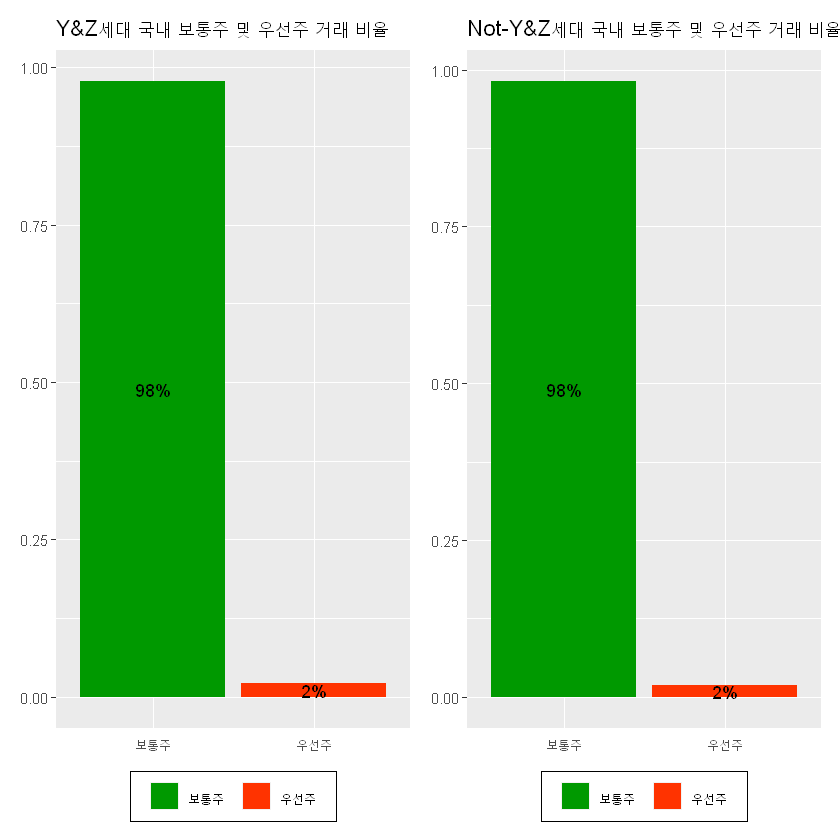

In [27]:
iem_cd_kr = c(iem_info$iem_cd[grep('^[A][^A-Z]....[^A-Z]$', iem_info$iem_cd)], iem_info$iem_cd[grep('^[J][^A-Z]....[^A-Z]$', iem_info$iem_cd)],
              iem_info$iem_cd[grep('J[^A-Z]......[^A-Z]$', iem_info$iem_cd)], iem_info$iem_cd[grep('^[Q][^A-Z]....[^A-Z]$', iem_info$iem_cd)])
iem_krl_nm_kr = iem_info$iem_krl_nm[iem_info$iem_cd %in% iem_cd_kr]

common = iem_krl_nm_kr[-grep('우선주', iem_krl_nm_kr)]
length(common)
preference = iem_krl_nm_kr[grep('우선주', iem_krl_nm_kr)]
length(preference)

iem_trd_act_cus_yz = iem_trd_act_cus_yz %>% 
  mutate(stock=ifelse(iem_krl_nm %in% common, '보통주', '우선주'))
table(iem_trd_act_cus_yz$stock)
table(iem_trd_act_cus_yz$stock)[1]/(table(iem_trd_act_cus_yz$stock)[1]+table(iem_trd_act_cus_yz$stock)[2])*100
table(iem_trd_act_cus_yz$stock)[2]/(table(iem_trd_act_cus_yz$stock)[1]+table(iem_trd_act_cus_yz$stock)[2])*100
iem_trd_act_cus_nyz = iem_trd_act_cus_nyz %>% 
  mutate(stock=ifelse(iem_krl_nm %in% common, '보통주', '우선주'))
table(iem_trd_act_cus_nyz$stock)
table(iem_trd_act_cus_nyz$stock)[1]/(table(iem_trd_act_cus_nyz$stock)[1]+table(iem_trd_act_cus_nyz$stock)[2])*100
table(iem_trd_act_cus_nyz$stock)[2]/(table(iem_trd_act_cus_nyz$stock)[1]+table(iem_trd_act_cus_nyz$stock)[2])*100

iem_trd_act_cus_yz %>% 
  ggplot(aes(stock, fill=stock)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  scale_fill_discrete(labels=c("보통주", "우선주")) +
  scale_fill_manual(values=c('보통주'="#009900", '우선주'="#FF3300")) +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle('Y&Z세대 국내 보통주 및 우선주 거래 비율') +
iem_trd_act_cus_nyz %>% 
  ggplot(aes(stock, fill=stock)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank(),
        legend.position = "bottom",
        legend.box.background = element_rect(),
        legend.box.margin = margin(1,1,1,1)) +
  scale_fill_discrete(labels=c("보통주", "우선주")) +
  scale_fill_manual(values=c('보통주'="#009900", '우선주'="#FF3300")) +
  guides(fill = guide_legend(nrow = 1)) +
  ggtitle('Not-Y&Z세대 국내 보통주 및 우선주 거래 비율')

# Y&Z세대 vs Not-Y&Z세대(코스피 하락장에서의 매매 분포)
## 2019년 3월 19일 코스피 최저 1457.64

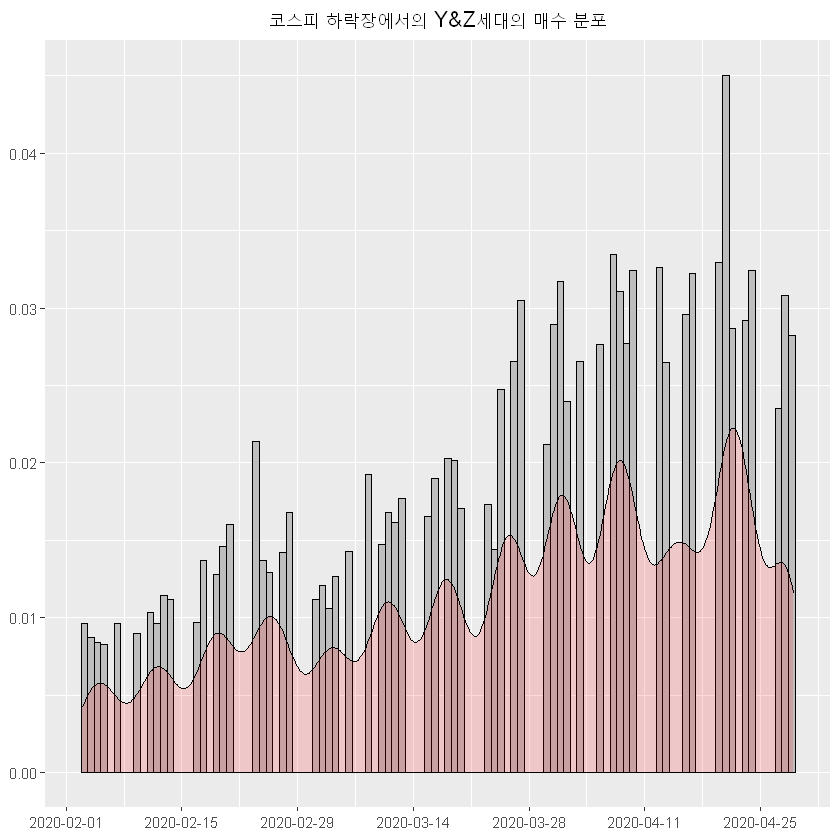

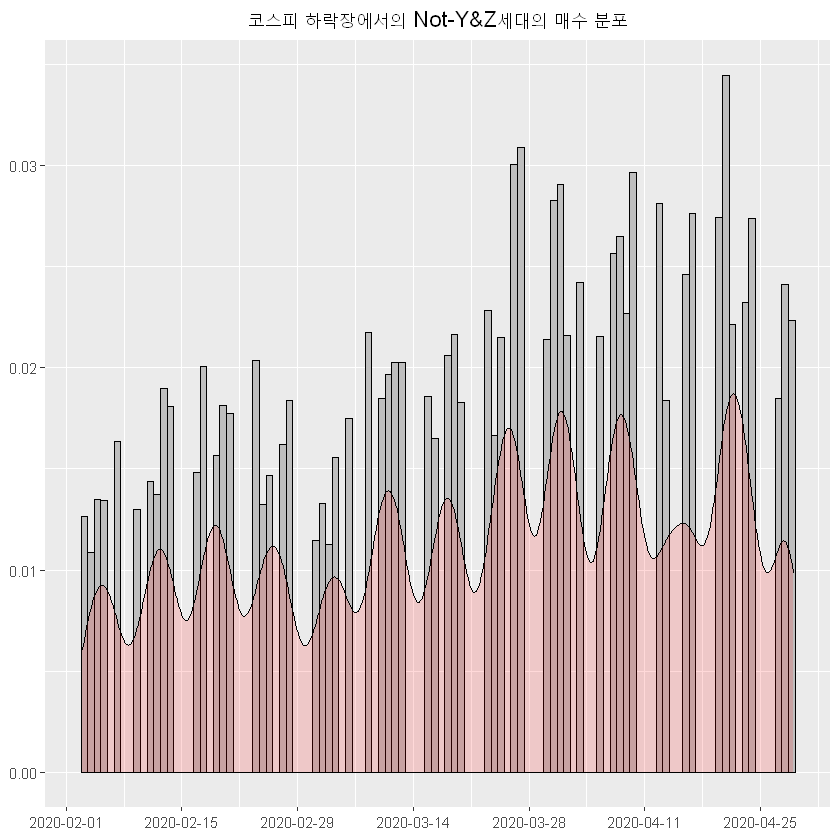

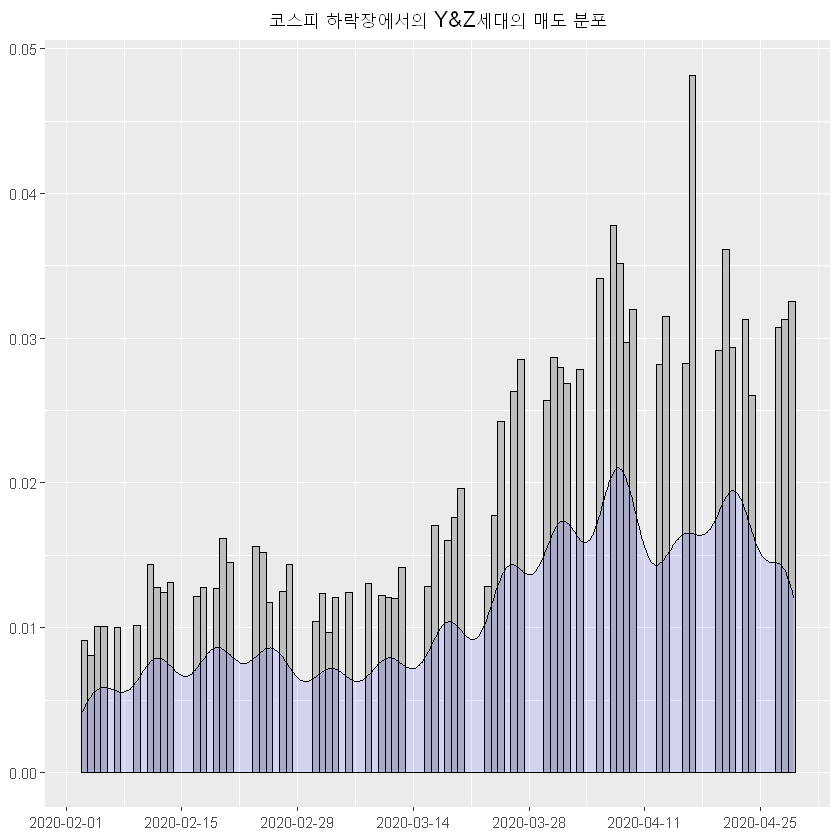

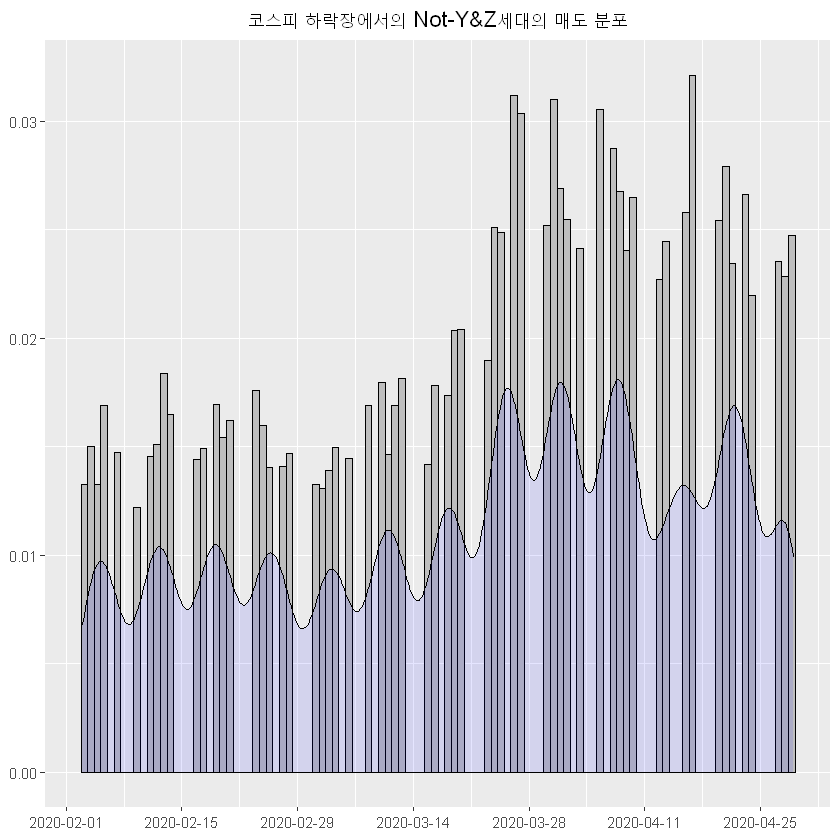

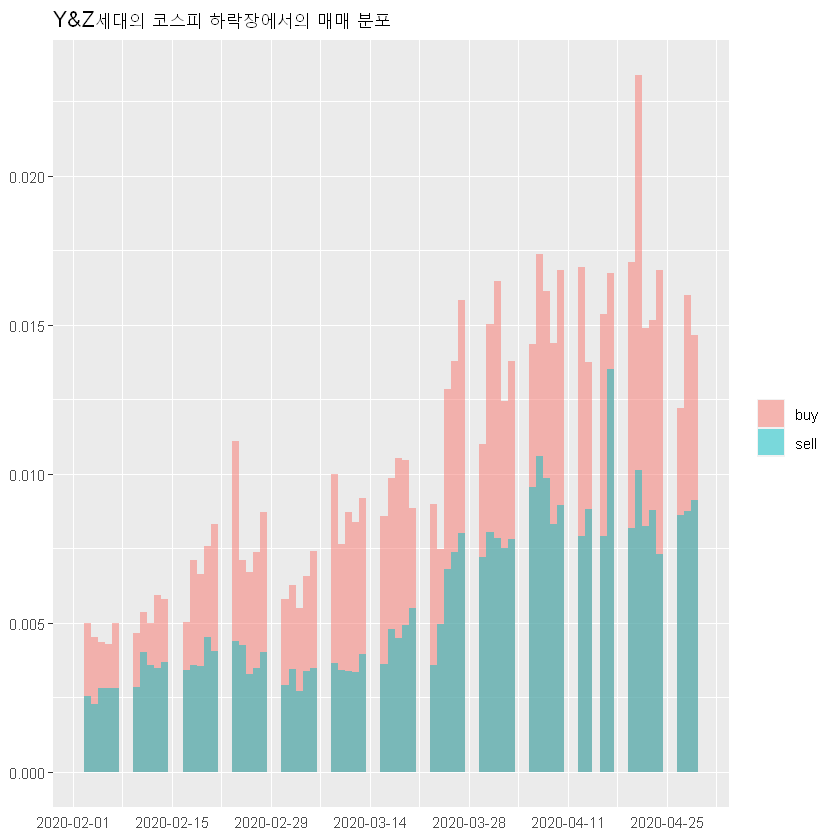

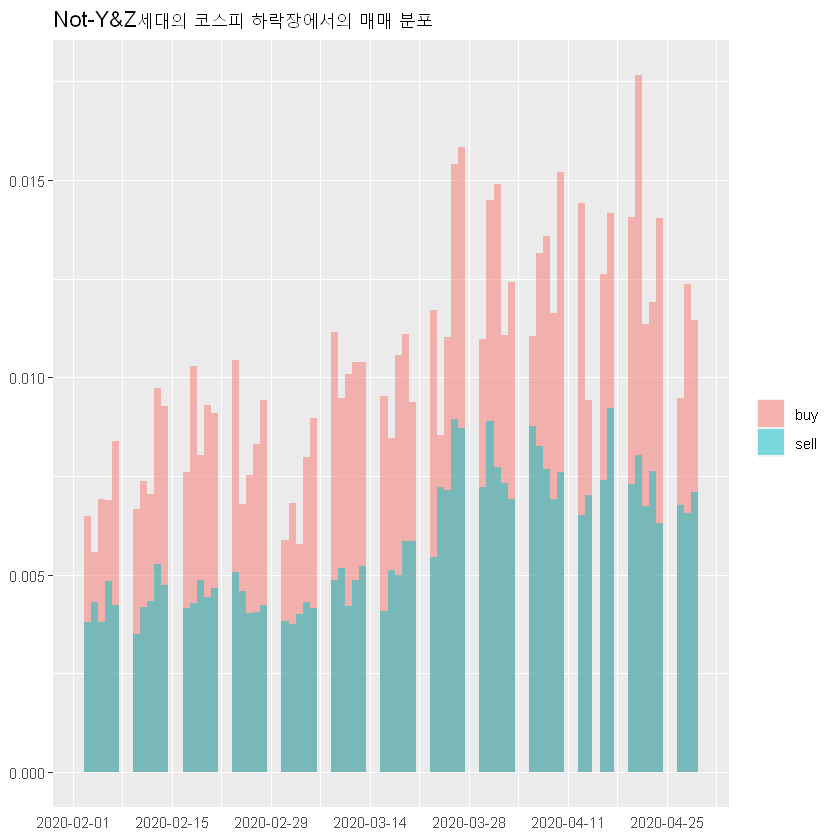

In [28]:
iem_trd_act_cus_yz %>% 
  mutate(orr_dt = as.Date(as.character(orr_dt), '%Y%m%d')) %>% 
  filter(orr_dt_ym==202002 | orr_dt_ym==202003 | orr_dt_ym==202004, sby_dit_cd=='buy') %>%
  ggplot(aes(orr_dt)) +
  geom_histogram(aes(y=..density..), binwidth=0.8, color='black', fill='gray')+
  geom_density(alpha=0.15, fill='red') +
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  scale_x_date(breaks=seq(as.Date("2020-02-01"), as.Date("2020-04-30"), by="14 day")) +
  ggtitle('코스피 하락장에서의 Y&Z세대의 매수 분포')
iem_trd_act_cus_nyz %>% 
  mutate(orr_dt = as.Date(as.character(orr_dt), '%Y%m%d')) %>% 
  filter(orr_dt_ym==202002 | orr_dt_ym==202003 | orr_dt_ym==202004, sby_dit_cd=='buy') %>%
  ggplot(aes(orr_dt)) +
  geom_histogram(aes(y=..density..), binwidth=0.8, color='black', fill='gray')+
  geom_density(alpha=0.15, fill='red') +
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  scale_x_date(breaks=seq(as.Date("2020-02-01"), as.Date("2020-04-30"), by="14 day")) +
  ggtitle('코스피 하락장에서의 Not-Y&Z세대의 매수 분포')

iem_trd_act_cus_yz %>% 
  mutate(orr_dt = as.Date(as.character(orr_dt), '%Y%m%d')) %>% 
  filter(orr_dt_ym==202002 | orr_dt_ym==202003 | orr_dt_ym==202004, sby_dit_cd=='sell') %>%
  ggplot(aes(orr_dt)) +
  geom_histogram(aes(y=..density..), binwidth=0.8, color='black', fill='gray')+
  geom_density(alpha=0.1, fill='blue') +
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  scale_x_date(breaks=seq(as.Date("2020-02-01"), as.Date("2020-04-30"), by="14 day")) +
  ggtitle('코스피 하락장에서의 Y&Z세대의 매도 분포')
iem_trd_act_cus_nyz %>% 
  mutate(orr_dt = as.Date(as.character(orr_dt), '%Y%m%d')) %>% 
  filter(orr_dt_ym==202002 | orr_dt_ym==202003 | orr_dt_ym==202004, sby_dit_cd=='sell') %>%
  ggplot(aes(orr_dt)) +
  geom_histogram(aes(y=..density..), binwidth=0.8, color='black', fill='gray')+
  geom_density(alpha=0.1, fill='blue') +
  theme(plot.title = element_text(hjust=0.5)) +
  theme(axis.title.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  scale_x_date(breaks=seq(as.Date("2020-02-01"), as.Date("2020-04-30"), by="14 day")) +
  ggtitle('코스피 하락장에서의 Not-Y&Z세대의 매도 분포')

iem_trd_act_cus_yz %>% 
  mutate(orr_dt = as.Date(as.character(orr_dt), '%Y%m%d')) %>% 
  filter(orr_dt_ym==202002 | orr_dt_ym==202003 | orr_dt_ym==202004) %>%
  ggplot(aes(orr_dt, fill=sby_dit_cd)) +
  geom_histogram(aes(y = (..count..)/sum(..count..)), binwidth = 1, alpha=0.5, position='identity') +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle("Y&Z세대의 코스피 하락장에서의 매매 분포") +
  scale_x_date(breaks=seq(as.Date("2020-02-01"), as.Date("2020-04-30"), by="14 day")) 
iem_trd_act_cus_nyz %>% 
  mutate(orr_dt = as.Date(as.character(orr_dt), '%Y%m%d')) %>% 
  filter(orr_dt_ym==202002 | orr_dt_ym==202003 | orr_dt_ym==202004) %>%
  ggplot(aes(orr_dt, fill=sby_dit_cd)) +
  geom_histogram(aes(y = (..count..)/sum(..count..)), binwidth = 1, alpha=0.5, position='identity') +
  theme(axis.title.x=element_blank()) +
  theme(axis.ticks.x=element_blank()) +
  theme(axis.title.y=element_blank()) +
  theme(legend.title=element_blank()) +
  ggtitle("Not-Y&Z세대의 코스피 하락장에서의 매매 분포") +
  scale_x_date(breaks=seq(as.Date("2020-02-01"), as.Date("2020-04-30"), by="14 day"))

# [본론2]

투자 위험 종목이란, 투자 경고 종목의 지정에도 불구하고 계속해서 투기적인 흐름을 보이거나 뇌동매매로 불안정한 상승을 보이는 경우 투자 위험 종목으로 지정한다.
이러한 종목에 대한 투자는 고수익을 낼 수 있지만, 상당한 위험이 발생하게 된다. 즉, 아주 공격적인 투자 방법이라고 할 수 있다.
이러한 방법으로 투자를 한 고객들을 추출하여 특성을 알아본다.

# 투자위험종목에 투자한 고객 분석


## 투자위험종목 데이터에 대한 전처리

In [29]:
iem_danger = rbind(data.frame(read.csv("iem_danger.csv")),
                   data.frame(read.csv("iem_danger2.csv")))
iem_danger[,2] = as.character(iem_danger[,2])
iem_danger[1,2] = "227420"
iem_danger[21,2] = "271400"
iem_danger = iem_danger[,c(2,6,7,8)]
names(iem_danger) = c("iem_cd", "iem1", "start", "end")
iem_danger[,3] = as.Date(iem_danger[,3], "%Y/%m/%d")
iem_danger[,4] = as.Date(iem_danger[,4], "%Y/%m/%d")
iem_danger = ddply(iem_danger, .(iem_cd), summarise, start = min(start), end=max(end))

dan.fn = function(x) {
  if (!is.na(x[4])) {
    
    if (x[1] %in% iem_danger$iem_cd & x[2] >= x[3] & x[2] <= x[4]) {return(1)}
    else {return(0)}
    
  } else {
    return(0)
  }
}
trd_kr1 = left_join(trd_kr, act_info, by="act_id")
trd_kr1$iem_cd = substr(trd_kr$iem_cd, 2, 7)
trd_kr1$orr_dt = as.Date(as.character(trd_kr1$orr_dt), "%Y%m%d")
aa = left_join(trd_kr1, iem_danger, by='iem_cd')
trd_kr1$danger = apply(aa %>% select(iem_cd, orr_dt, start, end),
                      MARGIN = 1,
                      dan.fn)

# cus_dan: 투자위험도가 높은 종목을 매수한 고객 (1,498건: YZ - 566건 / NOT YZ - 932건)
# cus_yz$danger: 투자위험종목 매수 유(1)무(0)
cus_yz = iem_trd_act_cus_yz %>% distinct(cus_id)
cus_nyz = iem_trd_act_cus_nyz %>% distinct(cus_id)
cus_yz = left_join(cus_yz, cus_info)
cus_nyz = left_join(cus_nyz, cus_info)


trd_dan = trd_kr1[trd_kr1$danger==1 & trd_kr1$sby_dit_cd=="buy", ]

cus_dan = data.frame(cus_id = unique(trd_dan$cus_id))
cus_yz$danger[cus_yz$cus_id %in% cus_dan$cus_id] = 1
cus_yz$danger[!(cus_yz$cus_id %in% cus_dan$cus_id)] = 0
cus_nyz$danger[cus_nyz$cus_id %in% cus_dan$cus_id] = 1
cus_nyz$danger[!(cus_nyz$cus_id %in% cus_dan$cus_id)] = 0

Joining, by = "cus_id"
Joining, by = "cus_id"


## 투자위험종목을 거래한 고객의 고객등급에 대한 분포


       _         01        02        03        04        05        09 
 5.347594  1.871658  1.069519  6.149733 20.855615 30.748663 33.957219 


        _          01         02         03         04         05         09 
11.0000000  0.3666667  1.4666667  5.8666667 16.2333333 25.9000000 39.1666667 

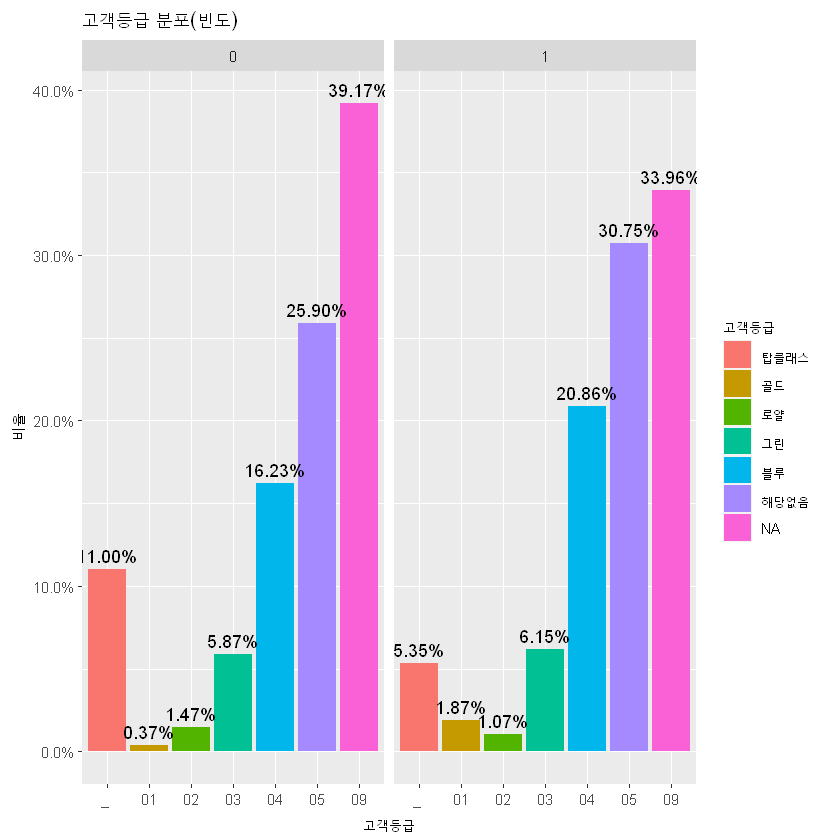

In [30]:
# 고객등급에 대한 분포
prop.table(table(cus_yz %>% filter(danger == 1) %>% select(tco_cus_grd_cd))) * 100
prop.table(table(cus_yz %>% filter(danger == 0) %>% select(tco_cus_grd_cd))) * 100

ggplot(cus_yz, aes(x = tco_cus_grd_cd,  group = danger)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..), y= ..prop.. ),
  stat= "count", vjust = -.5) +
  facet_grid(~ danger) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete(labels = c("탑클래스", "골드", "로얄", "그린", "블루", "해당없음")) + 
  labs(title = "고객등급 분포(빈도)",
       #subtitle = "부제목",
       #caption = "주석",
       x = "고객등급",
       y = "비율",
       fill = "고객등급")

위험종목에 투자하는 고객의 고객등급의 수준이 비교적 높음을 알 수 있음.

## 투자위험종목을 거래한 투자성향에 대한 분포


        -        00        01        02        03        04        05        09 
28.065395  0.000000  4.359673 19.891008 22.343324 17.983651  7.356948  0.000000 


          -          00          01          02          03          04 
39.12453342  0.00000000  2.98608755 15.40549712 16.59314557 16.79674245 
         05          09 
 9.06006108  0.03393281 

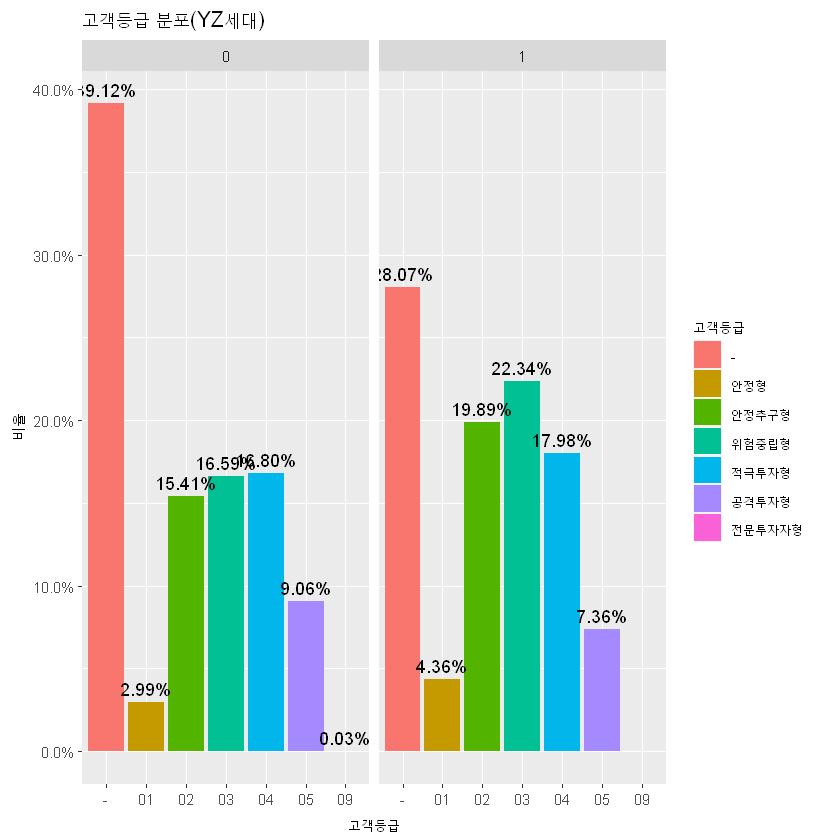

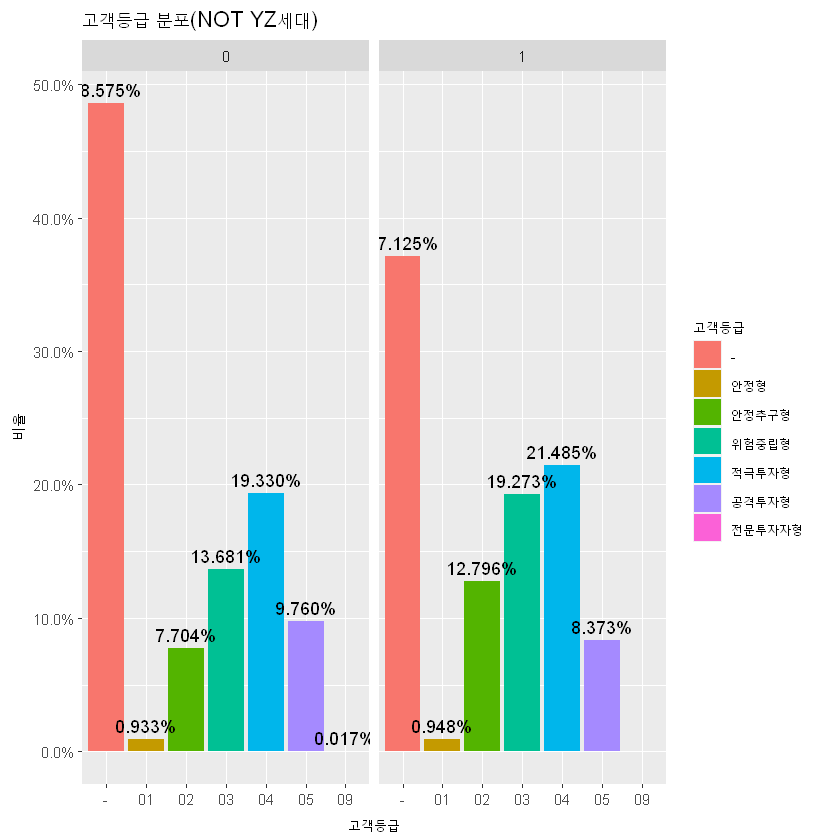

In [31]:
prop.table(table(cus_yz %>% filter(danger == 1, ivs_icn_cd != "00") %>% select(ivs_icn_cd))) * 100
prop.table(table(cus_yz %>% filter(danger == 0, ivs_icn_cd != "00") %>% select(ivs_icn_cd))) * 100

ggplot(cus_yz %>% filter(ivs_icn_cd != "00"), aes(x = ivs_icn_cd,  group = danger)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..), y= ..prop.. ),
  stat= "count", vjust = -.5) +
  facet_grid(~ danger) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete(labels = c("-", "안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자자형")) + 
  labs(title = "고객등급 분포(YZ세대)",
       #subtitle = "부제목",
       #caption = "주석",
       x = "고객등급",
       y = "비율",
       fill = "고객등급")

ggplot(cus_nyz %>% filter(ivs_icn_cd != "00"), aes(x = ivs_icn_cd,  group = danger)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..), y= ..prop.. ),
  stat= "count", vjust = -.5) +
  facet_grid(~ danger) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete(labels = c("-", "안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자자형")) + 
  labs(title = "고객등급 분포(NOT YZ세대)",
       #subtitle = "부제목",
       #caption = "주석",
       x = "고객등급",
       y = "비율",
       fill = "고객등급")

위험투자 고객에서 보수적이지 않은 등급의 비율이 조금 높긴 하지만, 대체적으로 크게 차이나지 않는다.
보수적인 투자와는 거리가 먼 투자방법이지만, 안정형, 안정추구형의 투자성향을 가진 고객들이 오히려 높거나 비슷하다는 사실이 상당히 아이러니하다.
이러한 문제는 2020년 코로나 사태와의 연관성이 있을 수 있으므로, 19년도 20년도로 거래정보를 나누어 분석을 수행한다.

## 투자위험종목을 거래한 투자성향에 대한 분포 (2019 / 2020)

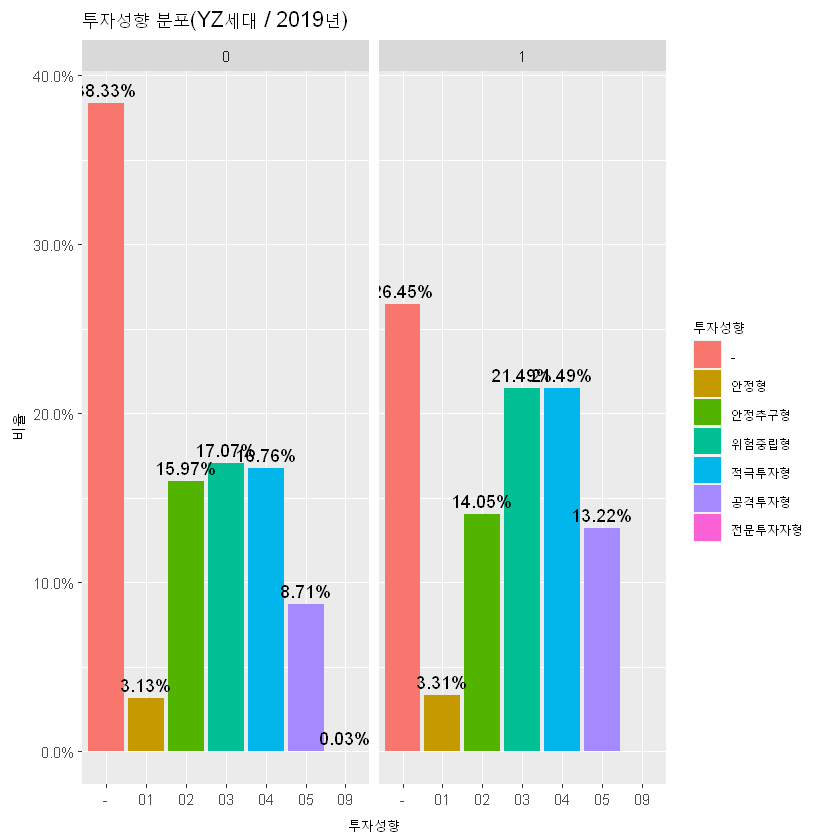

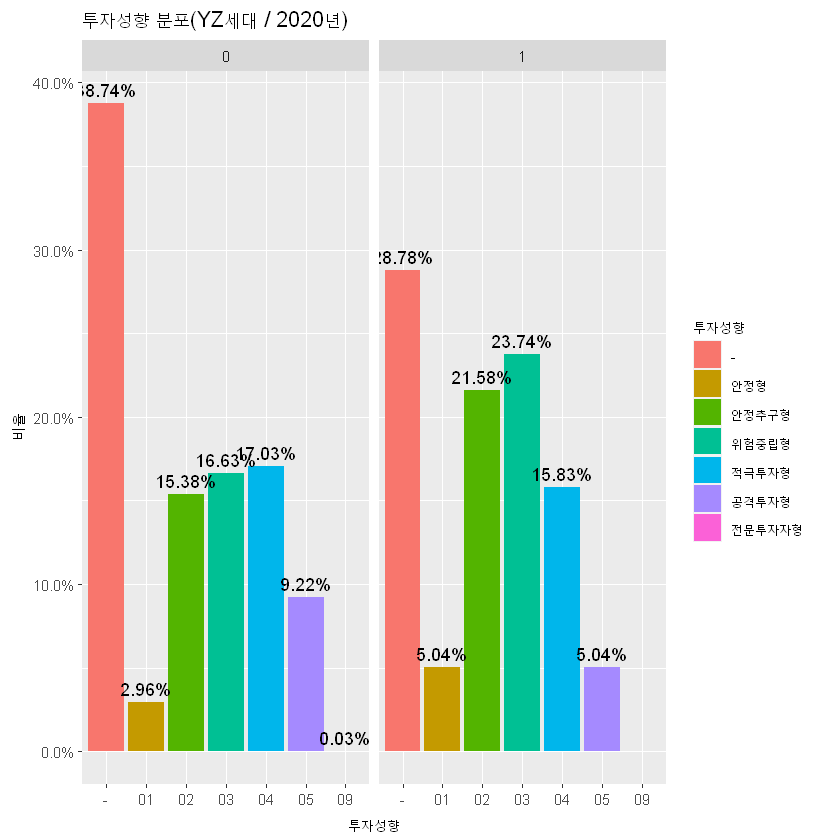

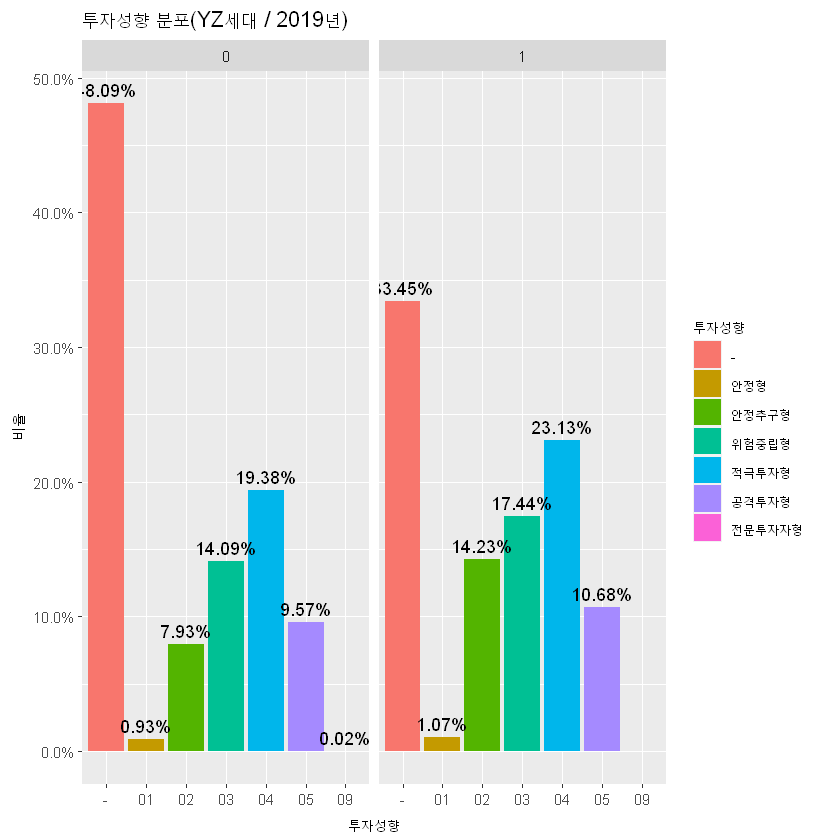

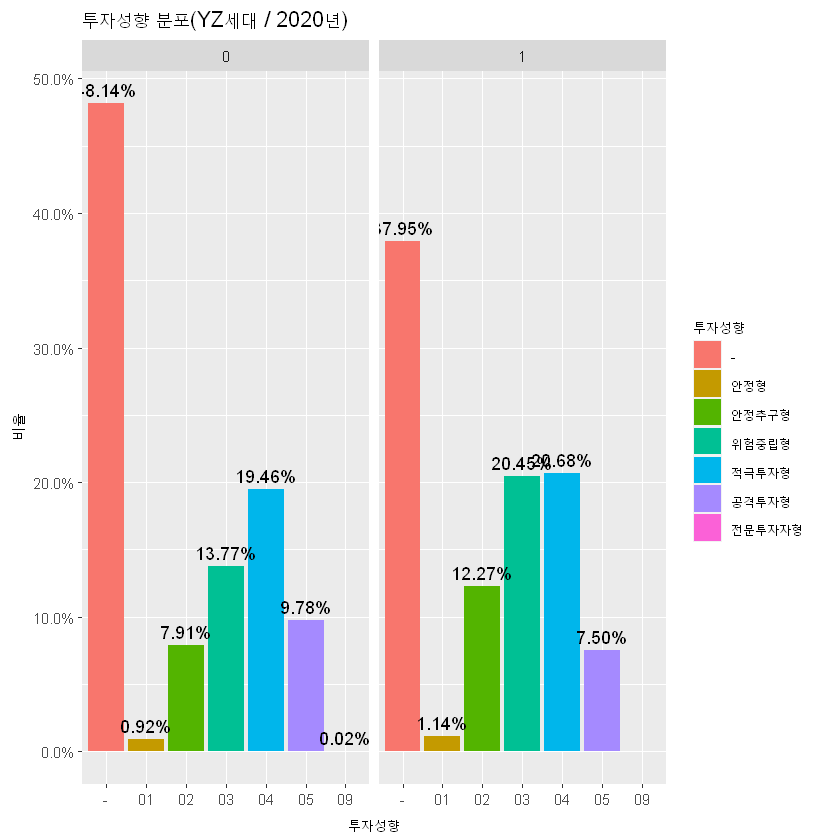

In [32]:
trd_dan_2019 = trd_dan %>% filter(trd_dan$orr_dt>= as.Date("2019-01-01"), trd_dan$orr_dt < as.Date("2020-01-01"))
trd_dan_2020 = trd_dan %>% filter(trd_dan$orr_dt>= as.Date("2020-01-01"), trd_dan$orr_dt < as.Date("2020-07-01"))

cus_dan_19 = data.frame(cus_id = unique(trd_dan_2019$cus_id))
cus_yz$danger19[cus_yz$cus_id %in% cus_dan_19$cus_id] = 1
cus_yz$danger19[!(cus_yz$cus_id %in% cus_dan_19$cus_id)] = 0
cus_nyz$danger19[cus_nyz$cus_id %in% cus_dan_19$cus_id] = 1
cus_nyz$danger19[!(cus_nyz$cus_id %in% cus_dan_19$cus_id)] = 0

cus_dan_20 = data.frame(cus_id = unique(trd_dan_2020$cus_id))
cus_yz$danger20[cus_yz$cus_id %in% cus_dan_20$cus_id] = 1
cus_yz$danger20[!(cus_yz$cus_id %in% cus_dan_20$cus_id)] = 0
cus_nyz$danger20[cus_nyz$cus_id %in% cus_dan_20$cus_id] = 1
cus_nyz$danger20[!(cus_nyz$cus_id %in% cus_dan_20$cus_id)] = 0

ggplot(cus_yz %>% filter(ivs_icn_cd != "00"), aes(x = ivs_icn_cd,  group = danger19)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..), y= ..prop.. ),
  stat= "count", vjust = -.5) +
  facet_grid(~ danger19) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete(labels = c("-","안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자자형")) + 
  labs(title = "투자성향 분포(YZ세대 / 2019년)",
       #subtitle = "부제목",
       #caption = "주석",
       x = "투자성향",
       y = "비율",
       fill = "투자성향")

ggplot(cus_yz %>% filter(ivs_icn_cd != "00"), aes(x = ivs_icn_cd,  group = danger20)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..), y= ..prop.. ),
  stat= "count", vjust = -.5) +
  facet_grid(~ danger20) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete(labels = c("-","안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자자형")) + 
  labs(title = "투자성향 분포(YZ세대 / 2020년)",
       #subtitle = "부제목",
       #caption = "주석",
       x = "투자성향",
       y = "비율",
       fill = "투자성향")

ggplot(cus_nyz %>% filter(ivs_icn_cd != "00"), aes(x = ivs_icn_cd,  group = danger19)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..), y= ..prop.. ),
  stat= "count", vjust = -.5) +
  facet_grid(~ danger19) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete(labels = c("-","안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자자형")) + 
  labs(title = "투자성향 분포(YZ세대 / 2019년)",
       #subtitle = "부제목",
       #caption = "주석",
       x = "투자성향",
       y = "비율",
       fill = "투자성향")

ggplot(cus_nyz %>% filter(ivs_icn_cd != "00"), aes(x = ivs_icn_cd,  group = danger20)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..), y= ..prop.. ),
  stat= "count", vjust = -.5) +
  facet_grid(~ danger20) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete(labels = c("-","안정형", "안정추구형", "위험중립형", "적극투자형", "공격투자형", "전문투자자형")) + 
  labs(title = "투자성향 분포(YZ세대 / 2020년)",
       #subtitle = "부제목",
       #caption = "주석",
       x = "투자성향",
       y = "비율",
       fill = "투자성향")

YZ세대에서, 2019년 위험종목에 투자한 고객과 비교하여 2020년에는 안정형, 안정추구형의 투자성향을 가진 고객들의 위험종목투자 비율이 눈에띄게 증가하고, 적극투자와 공격투자 고객의 비율이 큰 폭으로 감소하였다.
NOY YZ세대에서도 비슷하게, 안정추구형의 투자성향을 가진 고객들의 비율이 증가하고, 적극투자, 공격투자의 고객들의 비율이 감소하였다.
이는 2020년 코로나 발발 이후, 고객들의 투자성향을 바꾸어 투자하게 할 만큼 주식시장의 판도가 크게 변화하였음을 시사한다.

## 그럴만한 배경이 있을것이다. (추후 분석 예정)

# [결론]
## Y&Z세대 특징 요약

+ Y&Z세대의 고객들은 Not-Y&Z세대의 고객들에 비해 `탑클래스` ~ `그린` 등급에서 낮은 비율을, 블루 등급에서 높은 비율을 보인다.
+ Y&Z세대의 고객들은 Not-Y&Z세대보다 비교적 보수적인 투자성향을 보인다.
+ 대부분의 고객들은 거래매체 중 MTS를 주로 활용하는 모습을 보였고, 특히 Y&Z세대는 95% 이상의 MTS사용률을 보였다.
+ Y&Z세대에서 2019년 위험종목에 투자한 고객들에 비해 2020년에는 `안정형`, `안정추구형`의 투자성향을 가진 고객들의 비율이 눈에 띄게 증가하였음을 알 수 있다.